# <img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style( "darkgrid" )

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# load data
raw_sat = ''

sat_file = 'sat_scores.csv'

with open(sat_file,'r') as f:
    raw_sat = f.read()

In [3]:
# creating a list of lists

sat_list = [line.split(',') for line in raw_sat.split('\n')]

In [4]:
# first 5 elements of sat_list
sat_list[:5]

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505']]

In [5]:
# last 5 elements of sat_list
sat_list[-5:]

[['SD', '4', '577', '582'],
 ['ND', '4', '592', '599'],
 ['MS', '4', '566', '551'],
 ['All', '45', '506', '514'],
 ['']]

In [6]:
# removing last element in sat_list as it contains no relevant information

sat_list = sat_list[:-1]

# check for last 5 elements of sat_list
sat_list[-5:]

[['IA', '5', '593', '603'],
 ['SD', '4', '577', '582'],
 ['ND', '4', '592', '599'],
 ['MS', '4', '566', '551'],
 ['All', '45', '506', '514']]

In [7]:
# creating a dictionary where keys represent the first element of sat_list
# (i.e. column names)
# and values represent data that fall in respective columns

header = sat_list[0]
data = sat_list[1:]
data_list = []

for i in range(len(header)): 
    col_list = []
    for j in range(1,len(data)):
        col_list.append(sat_list[j][i])
        
    data_list.append(col_list)

sat_dict = dict(zip(header,data_list))                               
sat_dict

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',
  '526',
  '498'

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [8]:
# reading sat_dict as a dataframe
sat_dict_df = pd.DataFrame(sat_dict)

# creating a dataframe with .read_csv() method
sat_csv_df = pd.read_csv('sat_scores.csv')

# checking .dtypes for sat_dict_df and sat_csv_df
print('.dtypes for sat_dict_df')
print('-------------------------')
print(sat_dict_df.dtypes,'\n')
print('.dtypes for sat_csv_df')
print('-------------------------')
print(sat_csv_df.dtypes)

.dtypes for sat_dict_df
-------------------------
State     object
Rate      object
Verbal    object
Math      object
dtype: object 

.dtypes for sat_csv_df
-------------------------
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


### <font color='blue'> What is the difference between loading from file and inputting this dictionary (if any)? </font>

Inputting this dictionary to a dataframe gives an output of data points that are all strings. on the other hand, loading the data set from file and creating a data frame gives the 'state' column as string and the remaining columns as integers.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [9]:
# view the first 10 rows of SAT dataframe
sat_csv_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


### <font color='blue'> Description of our data: </font>

- The first column of 'State' represents the abbreviations of the various states in United States <br>


- The second column of 'Rate' represents the participation rate, which is calculated by: (no. of graduating high school seniors by state participating in SAT / total no. of graduating high school seniors) <br>


- The third column of 'Verbal' represents the verbal score (one of the two exam components of SAT) <br>


- The fourth column of 'Math' represents the math score (the second exam component of SAT)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [10]:
data_dict = {'state':{'variable type': sat_csv_df.dtypes[0],
                      'variable description': 'abbreviation of state in US',
                     'dataset shape (rows)': sat_csv_df.shape[0],
                     'dataset shape (columns)': sat_csv_df.shape[1]},
            'rate':{'variable type': sat_csv_df.dtypes[1],
                      'variable description': 'participation rate of SAT by state',
                     'dataset shape (rows)': sat_csv_df.shape[0],
                     'dataset shape (columns)': sat_csv_df.shape[1]},
            'verbal':{'variable type': sat_csv_df.dtypes[2],
                      'variable description': 'SAT (verbal score)',
                     'dataset shape (rows)': sat_csv_df.shape[0],
                     'dataset shape (columns)': sat_csv_df.shape[1]},
            'math':{'variable type': sat_csv_df.dtypes[3],
                      'variable description': 'SAT (math score)',
                     'dataset shape (rows)': sat_csv_df.shape[0],
                     'dataset shape (columns)': sat_csv_df.shape[1]}}

data_dict

{'state': {'variable type': dtype('O'),
  'variable description': 'abbreviation of state in US',
  'dataset shape (rows)': 52,
  'dataset shape (columns)': 4},
 'rate': {'variable type': dtype('int64'),
  'variable description': 'participation rate of SAT by state',
  'dataset shape (rows)': 52,
  'dataset shape (columns)': 4},
 'verbal': {'variable type': dtype('int64'),
  'variable description': 'SAT (verbal score)',
  'dataset shape (rows)': 52,
  'dataset shape (columns)': 4},
 'math': {'variable type': dtype('int64'),
  'variable description': 'SAT (math score)',
  'dataset shape (rows)': 52,
  'dataset shape (columns)': 4}}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


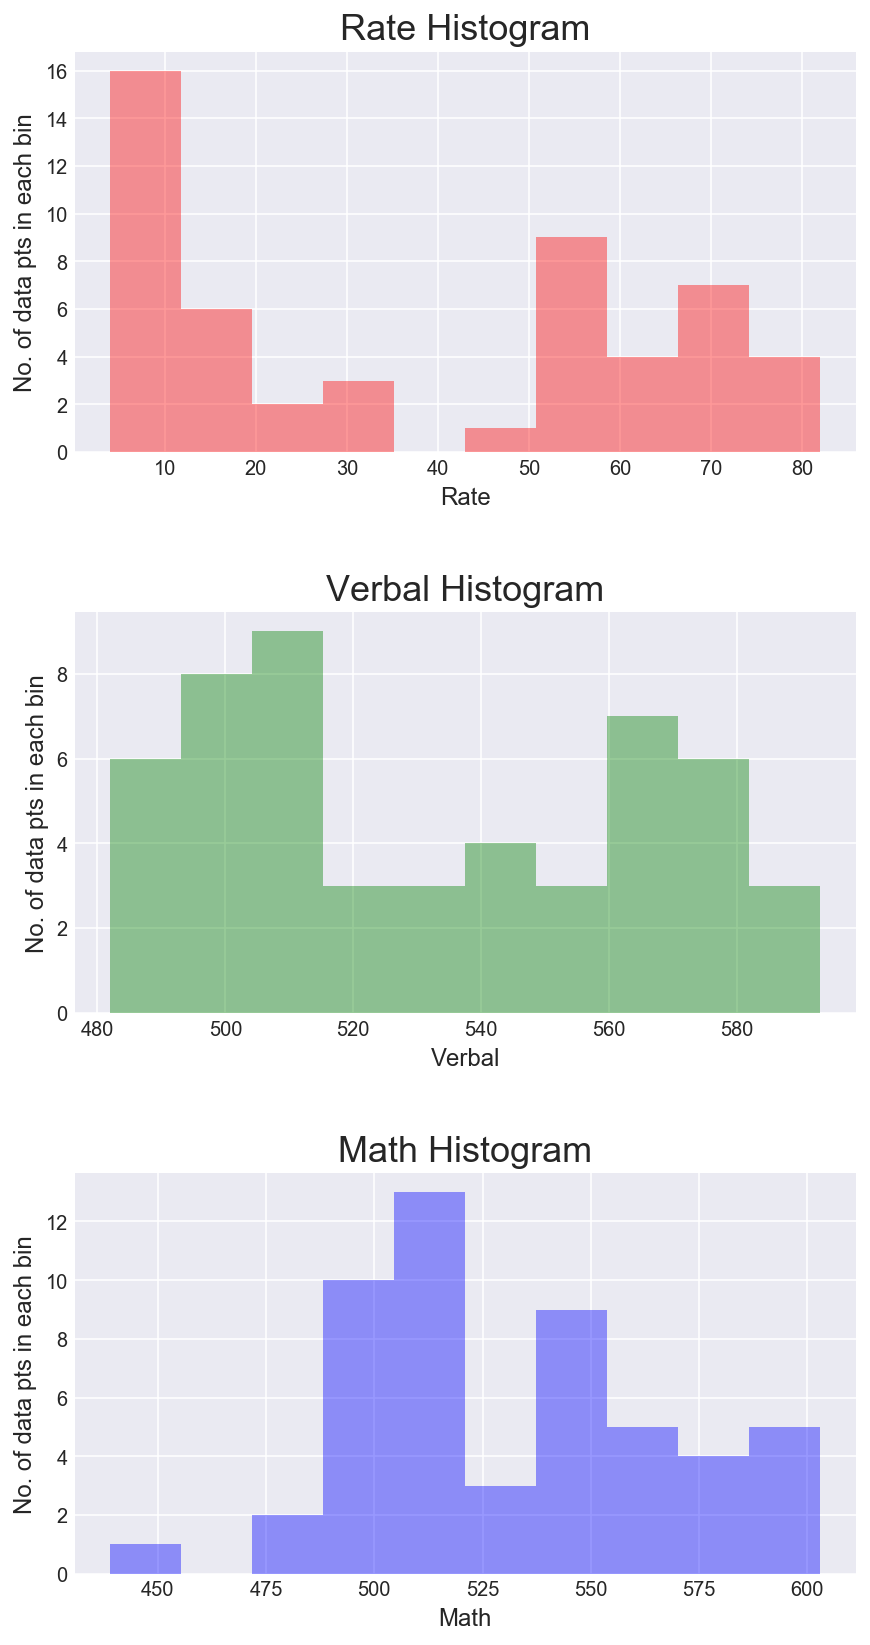

In [11]:
# creating subplots
fig, axs = plt.subplots(3,1,figsize=(7,14))
fig.subplots_adjust(hspace=0.4) # adjusting the horizontal spacing between subplots

data_header = sat_csv_df.columns[1:]
colors = ['red','green','blue']
count = 0

for col,color in zip(data_header,colors):
    sns.distplot(sat_csv_df[col],bins=10,kde=False,ax=axs[count],color=color)
    count += 1
    
count = 0

for num, col in zip(range(3),data_header):
    axs[num].set_title(col+' Histogram',fontsize=18)
    axs[num].set_xlabel(col,fontsize=12)
    axs[num].set_ylabel('No. of data pts in each bin',fontsize=12)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

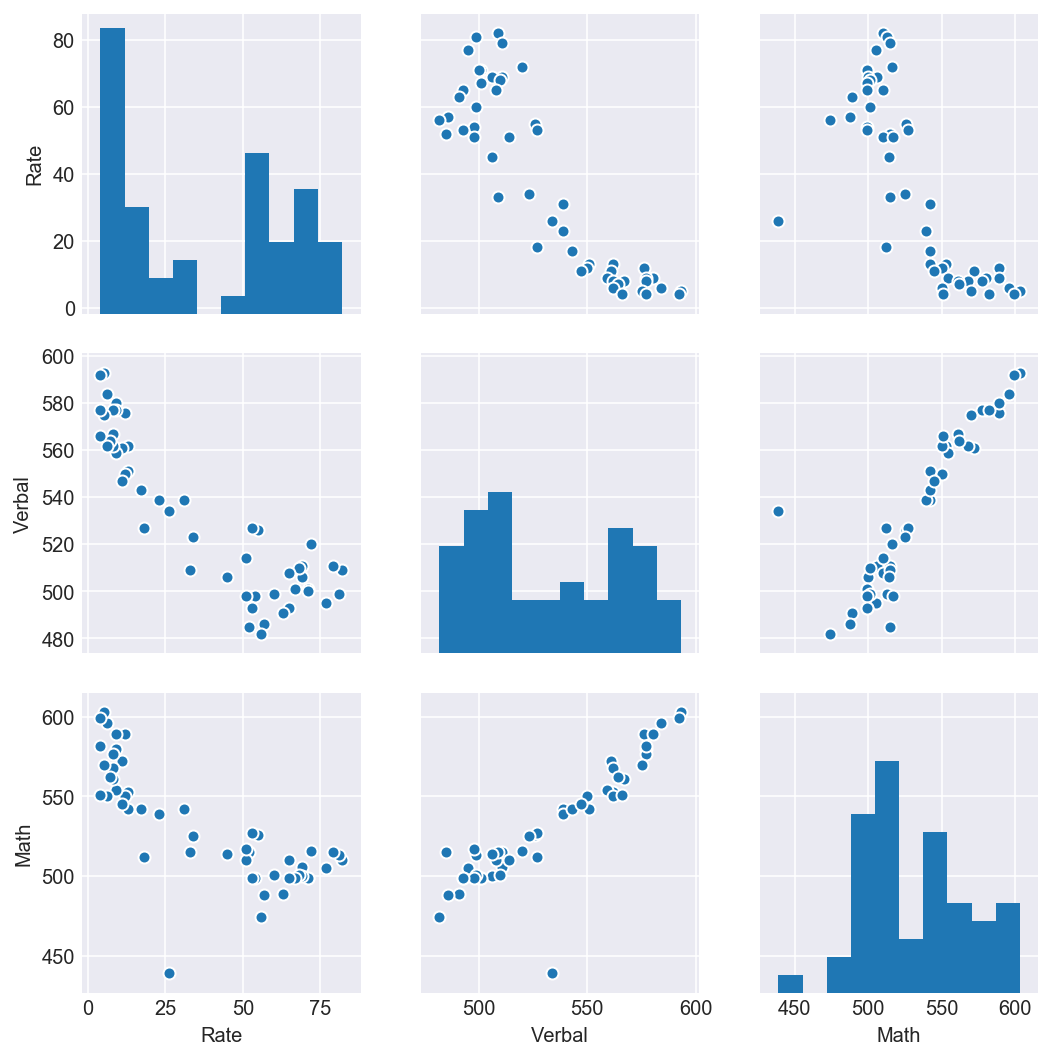

In [12]:
sns.pairplot(sat_csv_df)

### <font color='blue'> Explain what the visualization tells you about your data. <font>
    
Describing univariate distributions (based on histograms), the diagonal axes of sat_csv_df pairplot show the univariate histograms of 'Rate', 'Verbal' and 'Math'. 

#### The diagonal histograms
- 'Rate': its distribution is a tad similar to a right-tailed distribution where the mass of the distribution is a little concentrated on the left of the histogram  where it means that the number of states (frequency) in the US participating in the SAT exam with a low participation rate (in the histogram bins of 0 to ~30%) is high. However, for participation rate higher than ~30%, the histogram does not follow the exact definition of a right-tailed distribution as it does not taper off with a right skew. On the other hand, if we run a base statistics analysis on 'Rate', we have mean: 37.15 > median: 33.50 > mode: 4.00, satisfying the statistical property of a right-tailed distribution. <br>


- 'Verbal': its distribution is quite similar to a U shape, where the majority of the states in US achieved either high or low scores for the Verbal component of the SAT exam and a minority of the states did average for the Verbal test. The base statistics for 'Verbal' also showed that its mean: 532.02 and median: 526.50 are pretty close to each other and hence, it somewhat satisfies the statistical proeprty of a U-shaped distribution. <br>


- 'Math': although its base statistics of mean: 531.50 > median: 521.0 > mode: 499.0 satisfy the statistical property of a right-tailed distribution, its histogram plot shown below shows that a majority of the states lie on the centre and right side of the distribution. Optically, this is not typical of a right-tailed distribution where majority of the states should be concentrated on the left side of the histogram plot.

#### The three joint distributions
- 'Rate' / 'Verbal': the pairplot of 'Rate' and 'Verbal' shows that the higher the state's participation rate in the SAT exam, then on average, the poorer the state scores on the verbal component. This might be likely due to states with lower participation rate enrolling the more academically competent students for the exam so that the chances for this group of students entering college together is higher. On the other hand, states with higher participation rate enrol more students for the exam because of a different reason - whoever scores well for SAT will make the cut for college admission. As such, these states are targeting for more students to enter college even though the chances for this group admitting together is lower than the previous case. <br>


- 'Rate' / 'Math': similarly, the pairplot of 'Rate' and 'Math' shows that the higher the state's participation rate in the SAT exam, then on average, the poorer the state scores on the math component. However, optically, there's a slight difference where the strength of the negative correlation for 'Rate' and 'Math' seems to be slightly weaker than that of 'Rate' and 'Verbal'. Apart from this, the reasoning for the initial observation is similar to that of 'Rate' and 'Verbal'. <br>


- 'Verbal' / 'Math: the pairplot of 'Verbal' and 'Math' shows that on average, both variables share a positively correlated relationship. this implies that when a state scores well on one of the two components of SAT, then it is can be generally inferred that the state would score well on the other component. This implication also works for states that did not do so well for both components. We note that there's an outlier in this pairplot, where the state of 'OH' did average for the verbal component and it's expected it would do average for math. However, the actual observation shows that 'OH' did the worst out of all states in this data set and hence, this data point isn't positively correlated.

In [13]:
data_header

Index(['Rate', 'Verbal', 'Math'], dtype='object')

In [14]:
# mean, median, mode for columns in data_header
for col in data_header:
    print(col)
    print('mean: {}'.format(sat_csv_df[col].mean()))
    print('median: {}'.format(sat_csv_df[col].median()))
    print('mode: {} and it occurred {} times'.\
          format(stats.mode(sat_csv_df[col])[0][0],
                stats.mode(sat_csv_df[col])[1][0]),'\n')

Rate
mean: 37.15384615384615
median: 33.5
mode: 4 and it occurred 3 times 

Verbal
mean: 532.0192307692307
median: 526.5
mode: 562 and it occurred 3 times 

Math
mean: 531.5
median: 521.0
mode: 499 and it occurred 6 times 



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

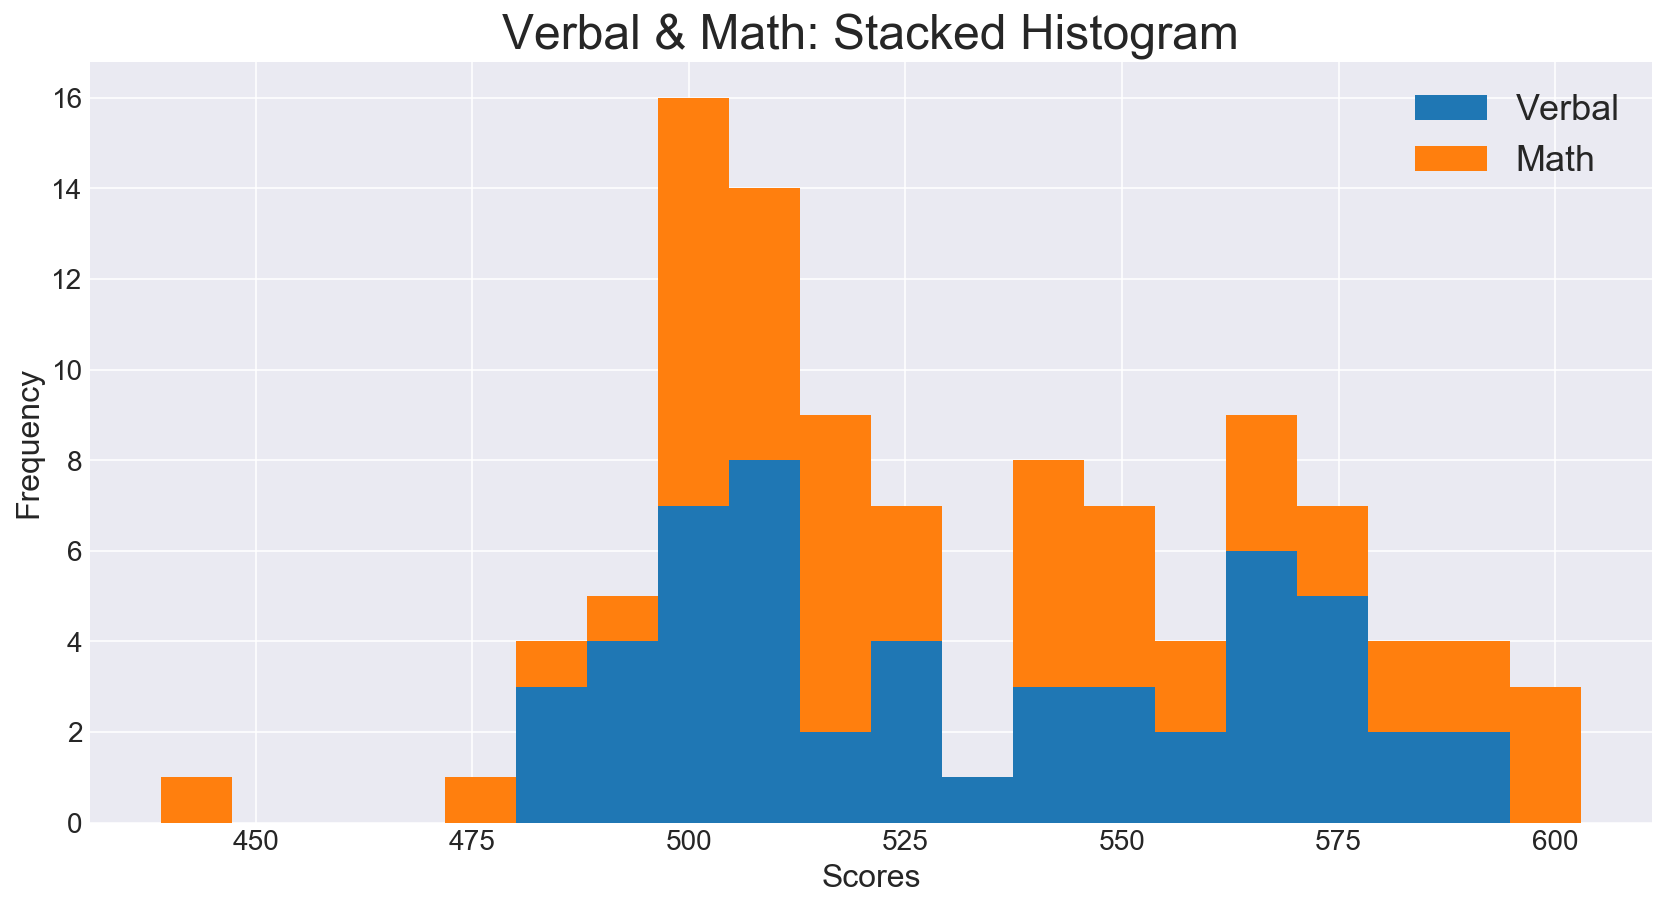

In [15]:
fig, ax = plt.subplots(figsize=(14,7))

sat_csv_df[['Verbal','Math']].plot(stacked=True,bins=20,kind='hist',ax=ax)

ax.set_title('Verbal & Math: Stacked Histogram',fontsize=24)
ax.set_xlabel('Scores',fontsize=16)
ax.set_ylabel('Frequency',fontsize=16)
ax.legend(fontsize=18)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

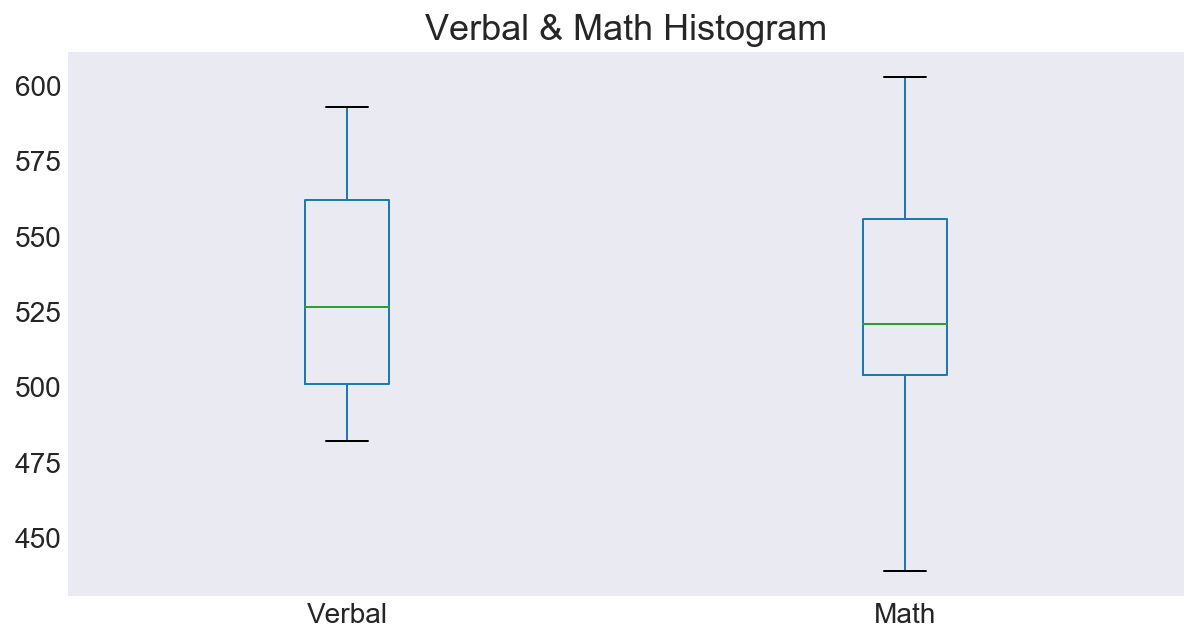

In [16]:
# plotting boxplots using pandas
fig, ax = plt.subplots(figsize=(10,5))
sat_csv_df.boxplot(column=['Verbal','Math'],grid=False)

ax.set_title('Verbal & Math Histogram',fontsize=18)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

### <font color='blue'> What are the benefits of using a boxplot as compared to a scatterplot or a histogram? </font>

#### Boxplot vs Scatterplot
- Although scatterplot displays the range / distribution of data, it's a little difficult to visualize it as its data points (per variable) do not lie along the same number line (the positioning of data points are affected by the other variable/axis). Hence, a boxplot is better for visualizing the range of data.

- Boxplots provide some indication of the dataset's symmetry and skewness.


#### Boxplot vs Histogram
- Boxplots show outliers but histograms do not. histograms, by its graphical nature, will categorize the outlier(s) as part of its bins and thus the information value on outliers is lost.

#### Summary (boxplot provides the following benefits):
- Shows 5-point summary and outliers;
- Easily compares two or more data sets;
- Handles extremely large data sets easily.

### <font color='blue'> What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`? </font>

As the data for 'Rate' and 'Verbal'/'Math' have different maximum and minimum values, it makes comparing the statistical properties of both variables on the same boxplot impractical and optically inconvenient (as shown below). Moreover, 'Rate' is at a ratio level of measurement and 'Verbal'/'Math' are ordinal level of measurement. Thus, comparing both variables on the same boxplot would not be suitable and data scaling is required if we were to have the boxplot of 'Rate' on the same chart as 'Math' and 'Verbal.'

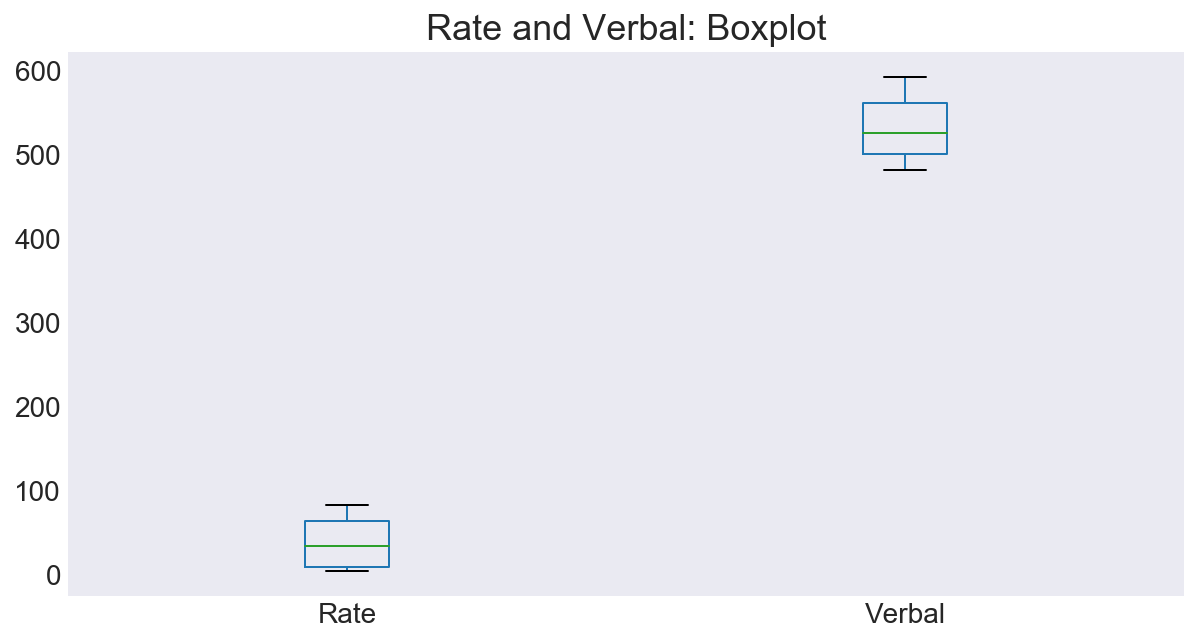

In [17]:
# boxplots of 'Rate' and 'Verbal'
fig, ax = plt.subplots(figsize=(10,5))

sat_csv_df.boxplot(column=['Rate','Verbal'],grid=False)

ax.set_title('Rate and Verbal: Boxplot',fontsize=18)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

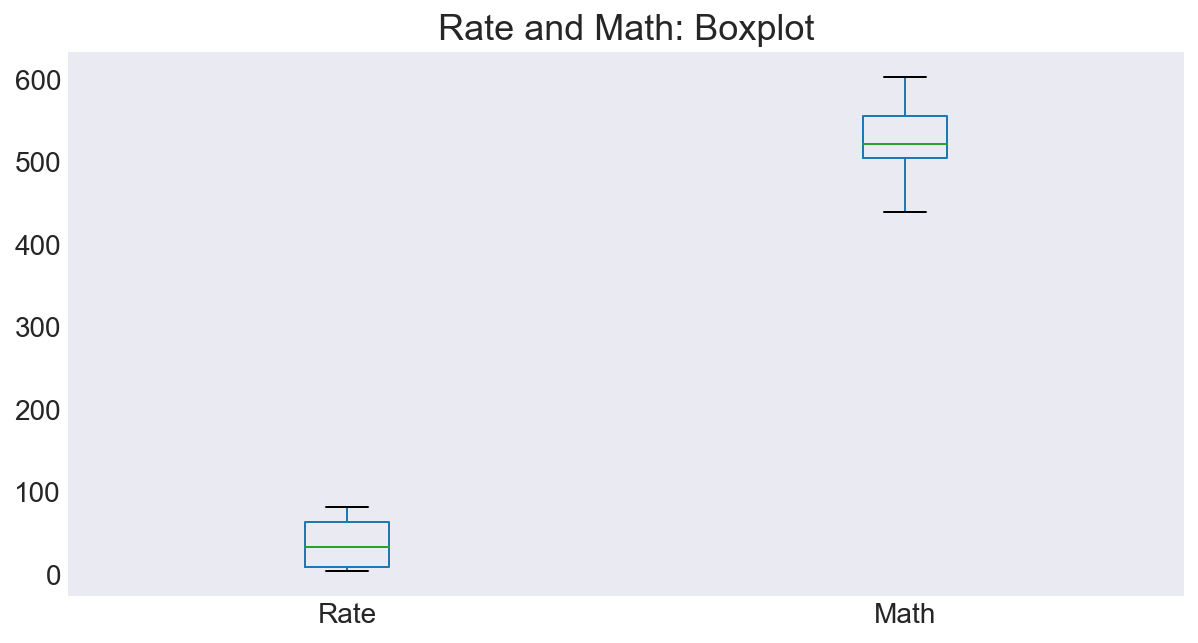

In [18]:
# boxplot of 'Rate' and 'Math'
fig, ax = plt.subplots(figsize=(10,5))

sat_csv_df.boxplot(column=['Rate','Math'],grid=False)

ax.set_title('Rate and Math: Boxplot',fontsize=18)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


### <font color='blue'> Think about how you might change the variables so that they would make sense on the same chart: </font>

- We will scale each data point according to the formula of: (x[i]-min(x)) / (max(x)-min(x))
- where x.i is referred as a data point in our x vector

### <font color='blue'> Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. </font>

- Normalization is chosen over standardization because the latter method is preferred for dataset whose distribution resembles that of a normal distribution.

In [19]:
data_header

Index(['Rate', 'Verbal', 'Math'], dtype='object')

In [20]:
# standardizing numeric columns in sat_csv_df
data_headersc = []

for col in data_header:
    data_headersc.append(col+'_sc')

count = 0

for col in data_headersc:
    sat_csv_df[col] = sat_csv_df[data_header[count]].\
    map(lambda x: (x-sat_csv_df[data_header[count]].min())/\
        (sat_csv_df[data_header[count]].max()-\
         sat_csv_df[data_header[count]].min()))
    
    count += 1

In [21]:
sat_csv_df.head()

,State,Rate,Verbal,Math,Rate_sc,Verbal_sc,Math_sc
0,CT,82,509,510,1.000000,0.243243,0.432927
1,NJ,81,499,513,0.987179,0.153153,0.451220
2,MA,79,511,515,0.961538,0.261261,0.463415
3,NY,77,495,505,0.935897,0.117117,0.402439
4,NH,72,520,516,0.871795,0.342342,0.469512


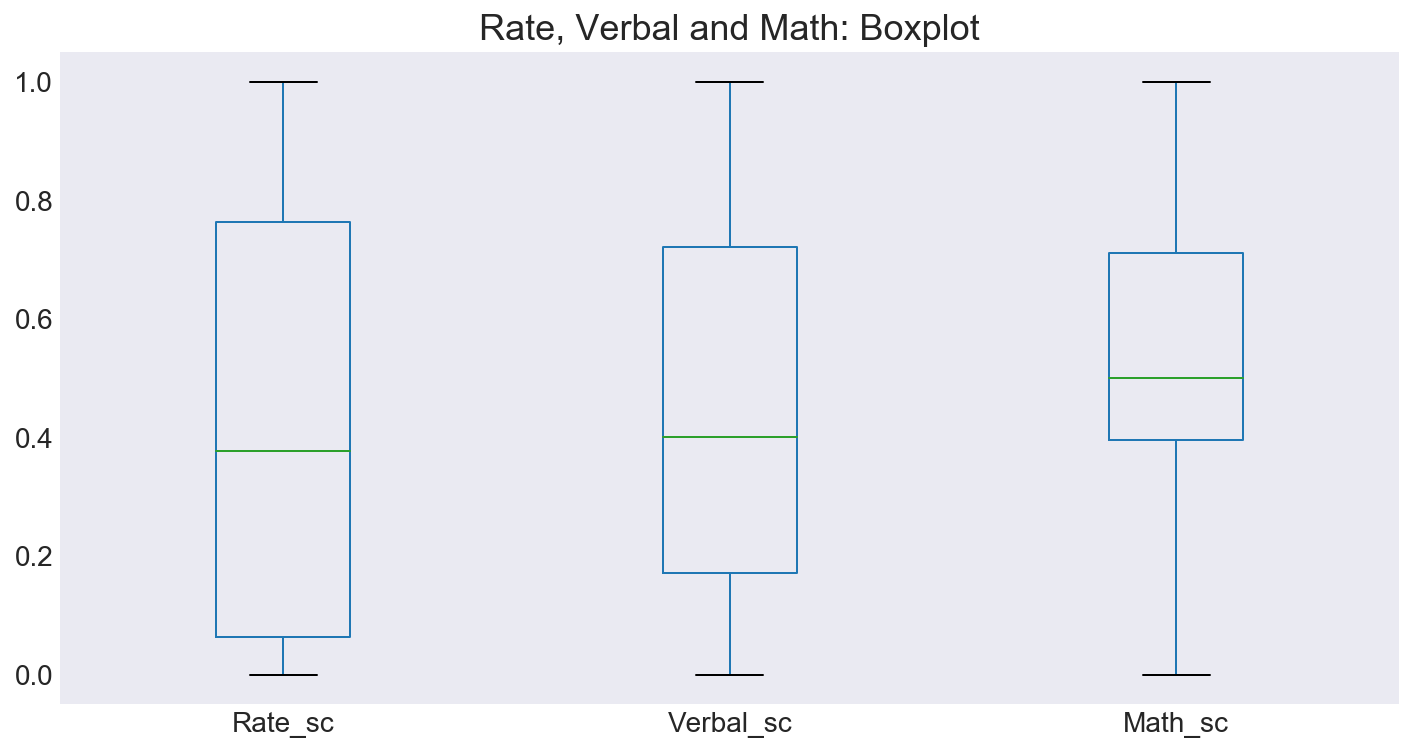

In [22]:
# boxplot of 'Rate', 'Verbal', 'Math'
fig, ax = plt.subplots(figsize=(12,6))

sat_csv_df.boxplot(column=['Rate_sc','Verbal_sc','Math_sc'],grid=False)

ax.set_title('Rate, Verbal and Math: Boxplot',fontsize=18)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [23]:
# state_list1 with Verbal scores greater than mean of Verbal 
state_list1 = list(sat_csv_df.loc[(sat_csv_df['Verbal'] > np.mean(sat_csv_df['Verbal'])),'State'].values)

print(state_list1,'\n')
print('There are {} states with Verbal scores above its mean'.format(len(state_list1)),'\n')
print('The mean score for Verbal across all states is {}'.format(round(np.mean(sat_csv_df['Verbal']),2)))

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'] 

There are 24 states with Verbal scores above its mean 

The mean score for Verbal across all states is 532.02


### <font color='blue'> What does this tell you about the distribution of Verbal scores? </font>

The proportion for the number of states with Verbal scores greater than the average of Verbal scores across all states stands at about 46.1%, which implies that the distribution of Verbal scores isn't symmetric. Since 53.9% of Verbal data points lie on the left side of its mean score and 46.1% of them lie on the right side of its mean score, the distribution of 'Verbal' can be described as a right-tailed distribution, which is consistent with that shown by its historgram plotted above.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [24]:
state_list2 = list(sat_csv_df.loc[(sat_csv_df['Verbal'] > np.median(sat_csv_df['Verbal'])),'State'].values)

print(state_list2)
print('')
print('There are {} states with Verbal scores above its median.'.format(len(state_list2)))
print('')
print('The median score for Verbal across all states is {}.'.format(np.median(sat_csv_df['Verbal'])))

['WA', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']

There are 26 states with Verbal scores above its median.

The median score for Verbal across all states is 526.5.


### <font color='blue'> How does this compare to the list of states greater than the mean of `Verbal` scores? Why? </font>

The number of states with Verbal scores greater than the median of Verbal scores across states is 26 (i.e. higher than the case of comparing with the mean of Verbal scores across states). This is consistent with the fact that based on the histogram plotted above, one should expect that the median of Verbal scores across states is lower than its mean score. Hence, based on both of the observations above, they aptly describe the statistical characteristics of 'Verbal' being a right skewed distribution.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [25]:
sat_added_col = sat_csv_df.copy()
sat_added_col['Verbal-Math'] = sat_added_col['Verbal'] - sat_added_col['Math']

sat_added_col.head()

,State,Rate,Verbal,Math,Rate_sc,Verbal_sc,Math_sc,Verbal-Math
0,CT,82,509,510,1.000000,0.243243,0.432927,-1
1,NJ,81,499,513,0.987179,0.153153,0.451220,-14
2,MA,79,511,515,0.961538,0.261261,0.463415,-4
3,NY,77,495,505,0.935897,0.117117,0.402439,-10
4,NH,72,520,516,0.871795,0.342342,0.469512,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [26]:
# first dataframe
sat_sorted = sat_added_col.sort_values('Verbal-Math',ascending=False)

top_ten_states = sat_sorted[['State','Verbal-Math']][0:10]
print(top_ten_states[0:3],'\n')

# second dataframe
bottom_ten_states = sat_sorted[['State','Verbal-Math']][::-1][0:10]
print(bottom_ten_states[0:3])

   State  Verbal-Math
27    OH           95
50    MS           15
29    WV           15 

   State  Verbal-Math
21    HI          -30
23    CA          -19
1     NJ          -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [27]:
sat_csv_df[sat_csv_df.columns[1:]].corr()

,Rate,Verbal,Math,Rate_sc,Verbal_sc,Math_sc
Rate,1.000000,-0.886432,-0.773746,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000,-0.773746,0.899871,1.000000
Rate_sc,1.000000,-0.886432,-0.773746,1.000000,-0.886432,-0.773746
Verbal_sc,-0.886432,1.000000,0.899871,-0.886432,1.000000,0.899871
Math_sc,-0.773746,0.899871,1.000000,-0.773746,0.899871,1.000000


### <font color='blue'> What does the correlation matrix tell you? </font>

The variable pairs of 'Rate' and 'Verbal' & 'Rate' and 'Math' are negatively correlated. However, the strength of negative correlation for the former pair is stronger than the latter pair. Also, the variable pair of 'Verbal' and 'Math' is positively correlated. We note that in absolute terms, the correlation strength between 'Verbal' and 'Math' is the strongest.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [28]:
sat_csv_df.describe()

,Rate,Verbal,Math,Rate_sc,Verbal_sc,Math_sc
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.425049,0.450624,0.564024
std,27.301788,33.236225,36.014975,0.350023,0.299425,0.219604
min,4.000000,482.000000,439.000000,0.000000,0.000000,0.000000
25%,9.000000,501.000000,504.000000,0.064103,0.171171,0.396341
50%,33.500000,526.500000,521.000000,0.378205,0.400901,0.500000
75%,63.500000,562.000000,555.750000,0.762821,0.720721,0.711890
max,82.000000,593.000000,603.000000,1.000000,1.000000,1.000000


### <font color='blue'> Write up what each of the rows returned by the function indicate. </font>

- count: number of data points for this SAT data set <br>


- mean: average for each numeric column <br>


- std: standard deviation for each numeric column <br>


- min: the minimum value for each numeric column <br>


- 25%: 25th percentile for each numeric column <br>


- 50%: 50th percentile or the median number for each numeric column <br>


- 75%: 75th percentile for each numeric column <br>


- max: the maximum value for each numeric column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [29]:
sat_csv_df.cov()

,Rate,Verbal,Math,Rate_sc,Verbal_sc,Math_sc
Rate,745.387632,-804.355958,-760.803922,9.556252,-7.246450,-4.639048
Verbal,-804.355958,1104.646682,1077.147059,-10.312256,9.951772,6.567970
Math,-760.803922,1077.147059,1297.078431,-9.753896,9.704028,7.909015
Rate_sc,9.556252,-10.312256,-9.753896,0.122516,-0.092903,-0.059475
Verbal_sc,-7.246450,9.951772,9.704028,-0.092903,0.089656,0.059171
Math_sc,-4.639048,6.567970,7.909015,-0.059475,0.059171,0.048226


### <font color='blue'> Answers for the 3 sub questions under question 6.3 </font>

1. Covariance does not use one standard unit of measurement and correlation is dimensionless (i.e. it is a unit-free measure of the relationship between variables). Hence, covariance can inform us whether the variables are positively or negatively related, however, correlation can tell us the magnitude of which they move together. 


2. To convert covariance to correlation, we standardize covariance by dividing Cov(X,Y) with the product of sample standard deviations of X and Y.


3. Correlation gives us both the direction (i.e. positive or negative) and the strength of the linear relationship between X and Y variables. Also, correlation is scale and location invariant, which means regardless the numerical changes we make to scales of X and Y, correlation remains unaffected as compared to covariance because of the standardization by the sample standard deviaions of X and Y variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [30]:
# load data
drug_df = pd.read_csv('drug-use-by-age.csv')

In [31]:
# summary statistics
drug_df.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,inhalant-use,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,1.388235,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,0.927283,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,0.000000,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,0.600000,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,1.400000,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,2.000000,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,3.000000,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [32]:
# dimension
print('drug_df shape: {}'.format(drug_df.shape))

drug_df shape: (17, 28)


In [33]:
# info of drug_df
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [34]:
# replace '-' where it's found in drug_df with 0s
drug_df = drug_df.replace('-',0)

In [35]:
# changing all columns (except column 1, 'age') to float
for i in drug_df.columns[1:]:
    drug_df[i] = drug_df[i].apply(lambda x: float(x))

In [36]:
# for the purpose of running heat map analysis with column 'age' included, we'll first classify the age groups of 
# 22-23 to 22, 24-25 to 24, ... 65+ to 65. subsequently, convert the column data type from string to float
drug_df['age'] = drug_df['age'].apply(lambda x: float(x[:2]))

In [37]:
# removing column 'n' for heat map analysis
drug_df = drug_df.drop('n',axis=1)

In [38]:
# splitting drug_df into druguse_df (drug uses dataframe) and drugfreq_df (drug frequencies dataframe). 
# Both exclude columns and 'age' and 'n'
druguse_df = drug_df.iloc[:,1::2]
drugfreq_df = drug_df.iloc[:,2::2]

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

### <font color='blue'> Written description regarding inferences drawn from the drug dataset:</font>
#### <font color='blue'> 1. Boxplot  and Histogram analysis: </font>
We are going to create boxplots for all drugs across all age groups. The drug_df will be split into two dataframes: a) drug uses and b) drug frequencies. Following that, we are going to identify the top 3 drugs in each dataframe based on their mean in druguse_df and median in drugfreq_df. The reason for choosing different measure of their central tendencies will be explained in the write up below.

#### Boxplot and Histogram for druguse_df

- Boxplot for druguse_df: <br>
    - Note that as the ranges for alcohol-use and marijuana-use are much larger than the rest of drug-use variables, their boxplot will be plotted separately. 
    - Based on these boxplots, we note that alcohol, marijuana, cocaine, hallucinogen, pain-reliever and tranquilizer are the most commonly used drugs.
    - Also, there are no outliers for druguse_df, and hence, we shall use mean for drug-use variables as its measure of central tendency.
    - As such, based on its mean and ranked in descending order, the top 3 drugs for druguse_df are: alcohol-use, marijuana-use and pain-reliever-use. <br>
    

- Histogram for top 3 drugs in druguse_df:
    - The shape of the three histograms reflect that they are left-skewed distributions.
    - Moreover, the mean for these three drugs are less than their median. These statistics are consistent with their optical distributions.
    
#### Boxplot and Histogram for drugfreq_df

- Boxplot for drugfreq_df: <br>
    -  Note that as the ranges for alcohol-frequency, marijuana-frequency, heroin-frequency and meth-frequency and also the presence of outliers for the latter two variables, their boxplot will be plotted separately.
    - Since there are outliers for drugfreq_df, we shall use median for drug-frequency variables as its measure of central tendency.
    - As such, based on its median and ranked in descending order, the top 3 drugs for drugfreq_df are: marijuana-frequency, heroin-frequency and alcohol-frequency. <br>
    
    
- Histogram for the top 3 drugs in drugfreq_df:
    - The shape of histogram for mariqjuana-freuquency, heroin-frequency and alcohol-frequency show that they are left-, right- and left-skewed distributed, respectively.
    - Their mean and median values correctly reflect these distributions.

#### <font color='blue'> 2. Line plot analysis: </font>

#### Line plot for top 3 drugs in druguse_df
- The three line plots for alcohol-use, marijuana-use and pain-reliever-use show that percentage usage across age groups in 12 to early-20s increase exponentially.
- Except for alcohol-use which declined steadily, marijuana-use and pain-reliever-use reduced quite dramatically after early-20s.


#### Line plot for top 3 drugs in drugfreq_df
- The line plots for the top 3 drugs in drugfreq_df are very different than those of top 3 drugs in druguse_df.
- For marijuana-frequency, there was an exponential increase from age groups of 12 to 30-34. It declined steadily thereafter.
- For heroin-frequency, the exponential increase only started from age groups of 30-34 to 35-49. It declined dramatically thereafter.
- For alcohol-frequency, the exponential increase started from age groups of 12 to 21. It remained constant thereafter.

#### <font color='blue'> 3. Correlation analysis: </font>


#### Correlation matrix for top 10 correlation pairs that exhibit strongest positive correlation
- Note that marijuana-use and stimulant-use are the most common variables that are positively correlated with those drugs in top10_poscorr dataframe.

#### Correlation matrix for top 10 correlation pairs that exhibit strongest negative correlation
- As the assumption is to prevent and/or reduce drug use in this case study, it is less informative to comment that for negatively correlated drugs, the increasing use of one drug sees a lower consumption of another drug. Ideally, we will like to see lower consumption/abuse rate of drugs.
- However, for purpose of analytics, we note that inhalant-frequency and inhalant-use are the most common variables which are negatively correlated with those drugs in top10_negcorr dataframe.




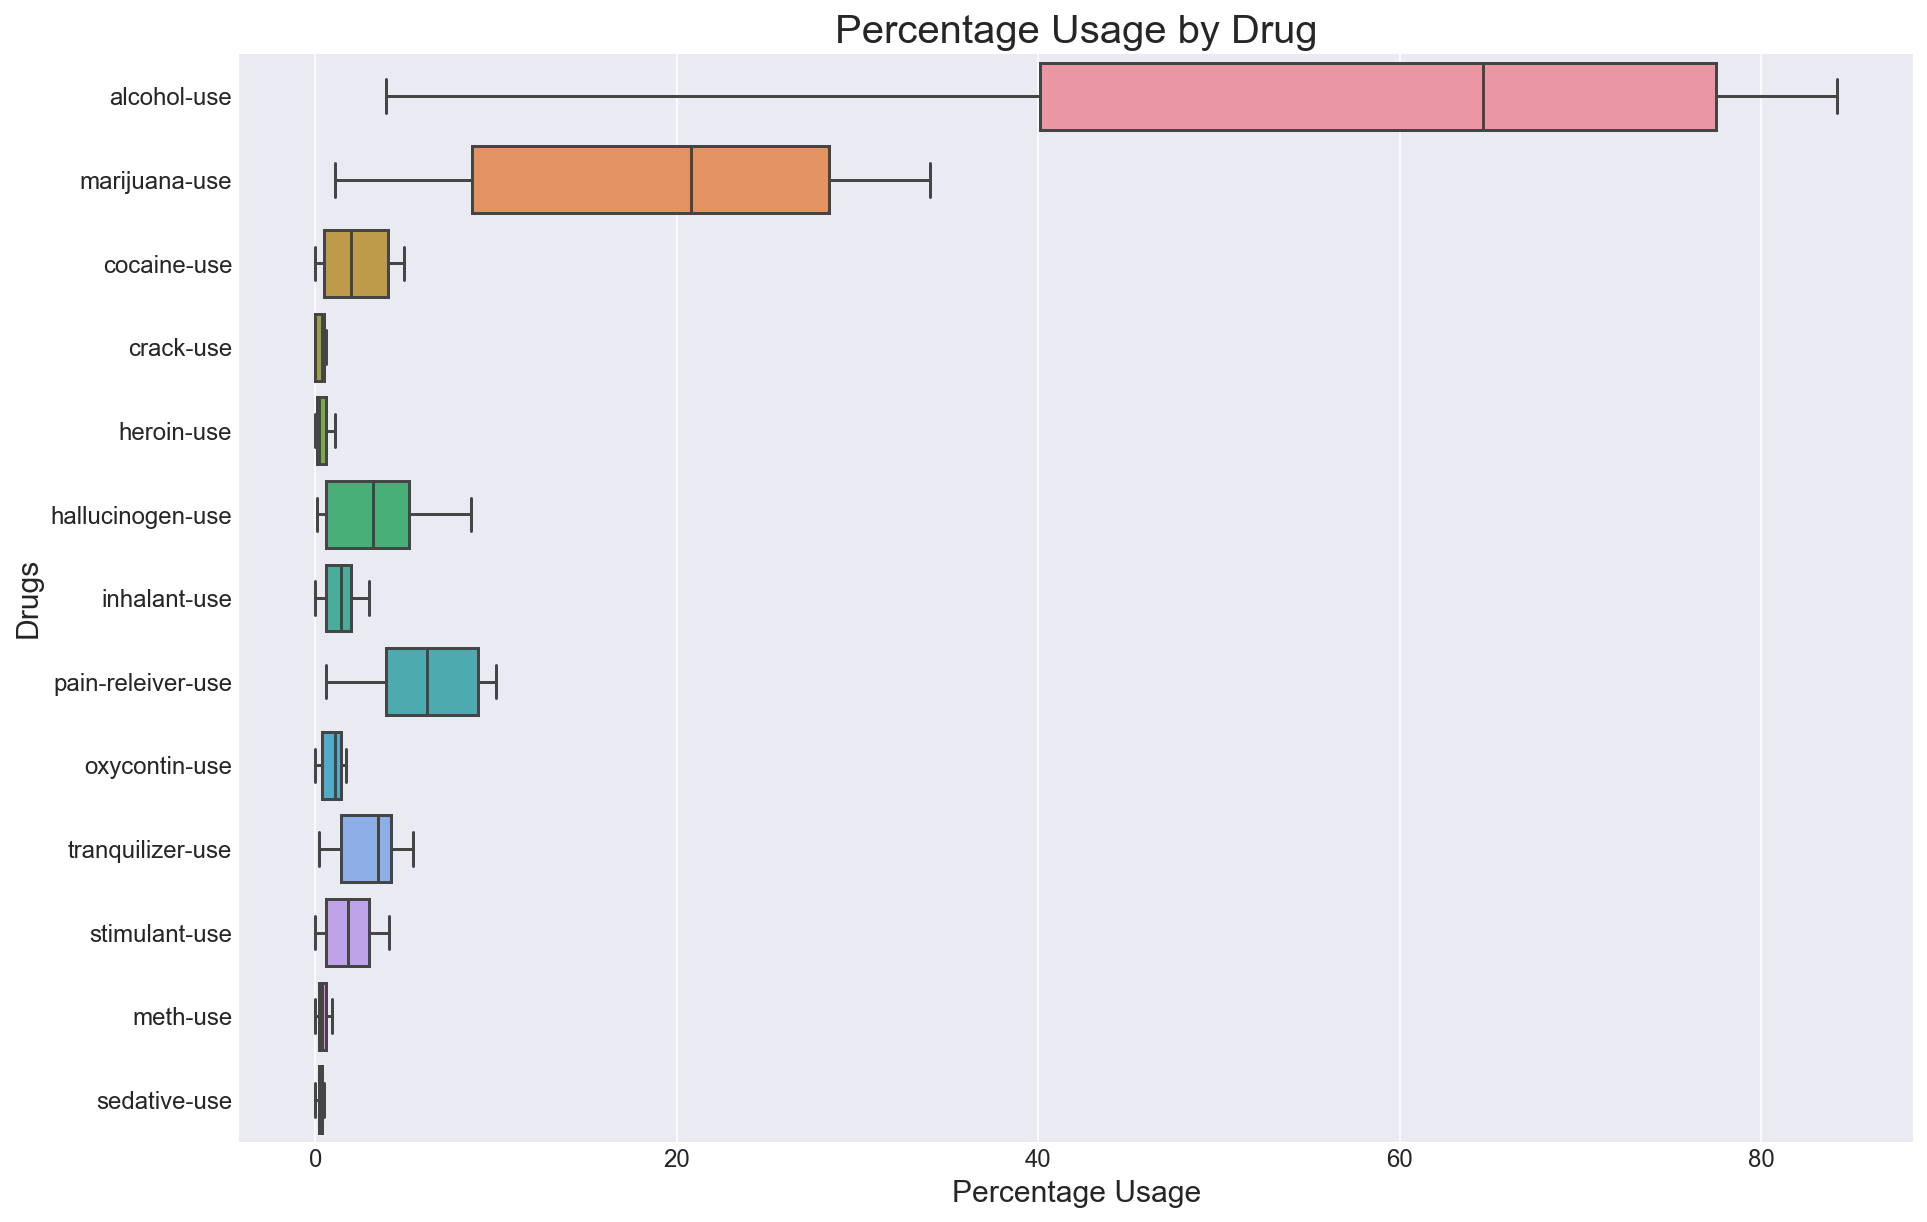

In [39]:
fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot(data=druguse_df,orient='h')

ax.set_title('Percentage Usage by Drug',fontsize=20)
ax.set_xlabel('Percentage Usage',fontsize=15)
ax.set_ylabel('Drugs',fontsize=15)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

In [40]:
# separating alcohol-use and marijuana-use from the rest of drug-use variables
# this is done for drug-use boxplot analysis
druguse_am = druguse_df[['alcohol-use','marijuana-use']]
druguse_remaining = druguse_df.iloc[:,2:]

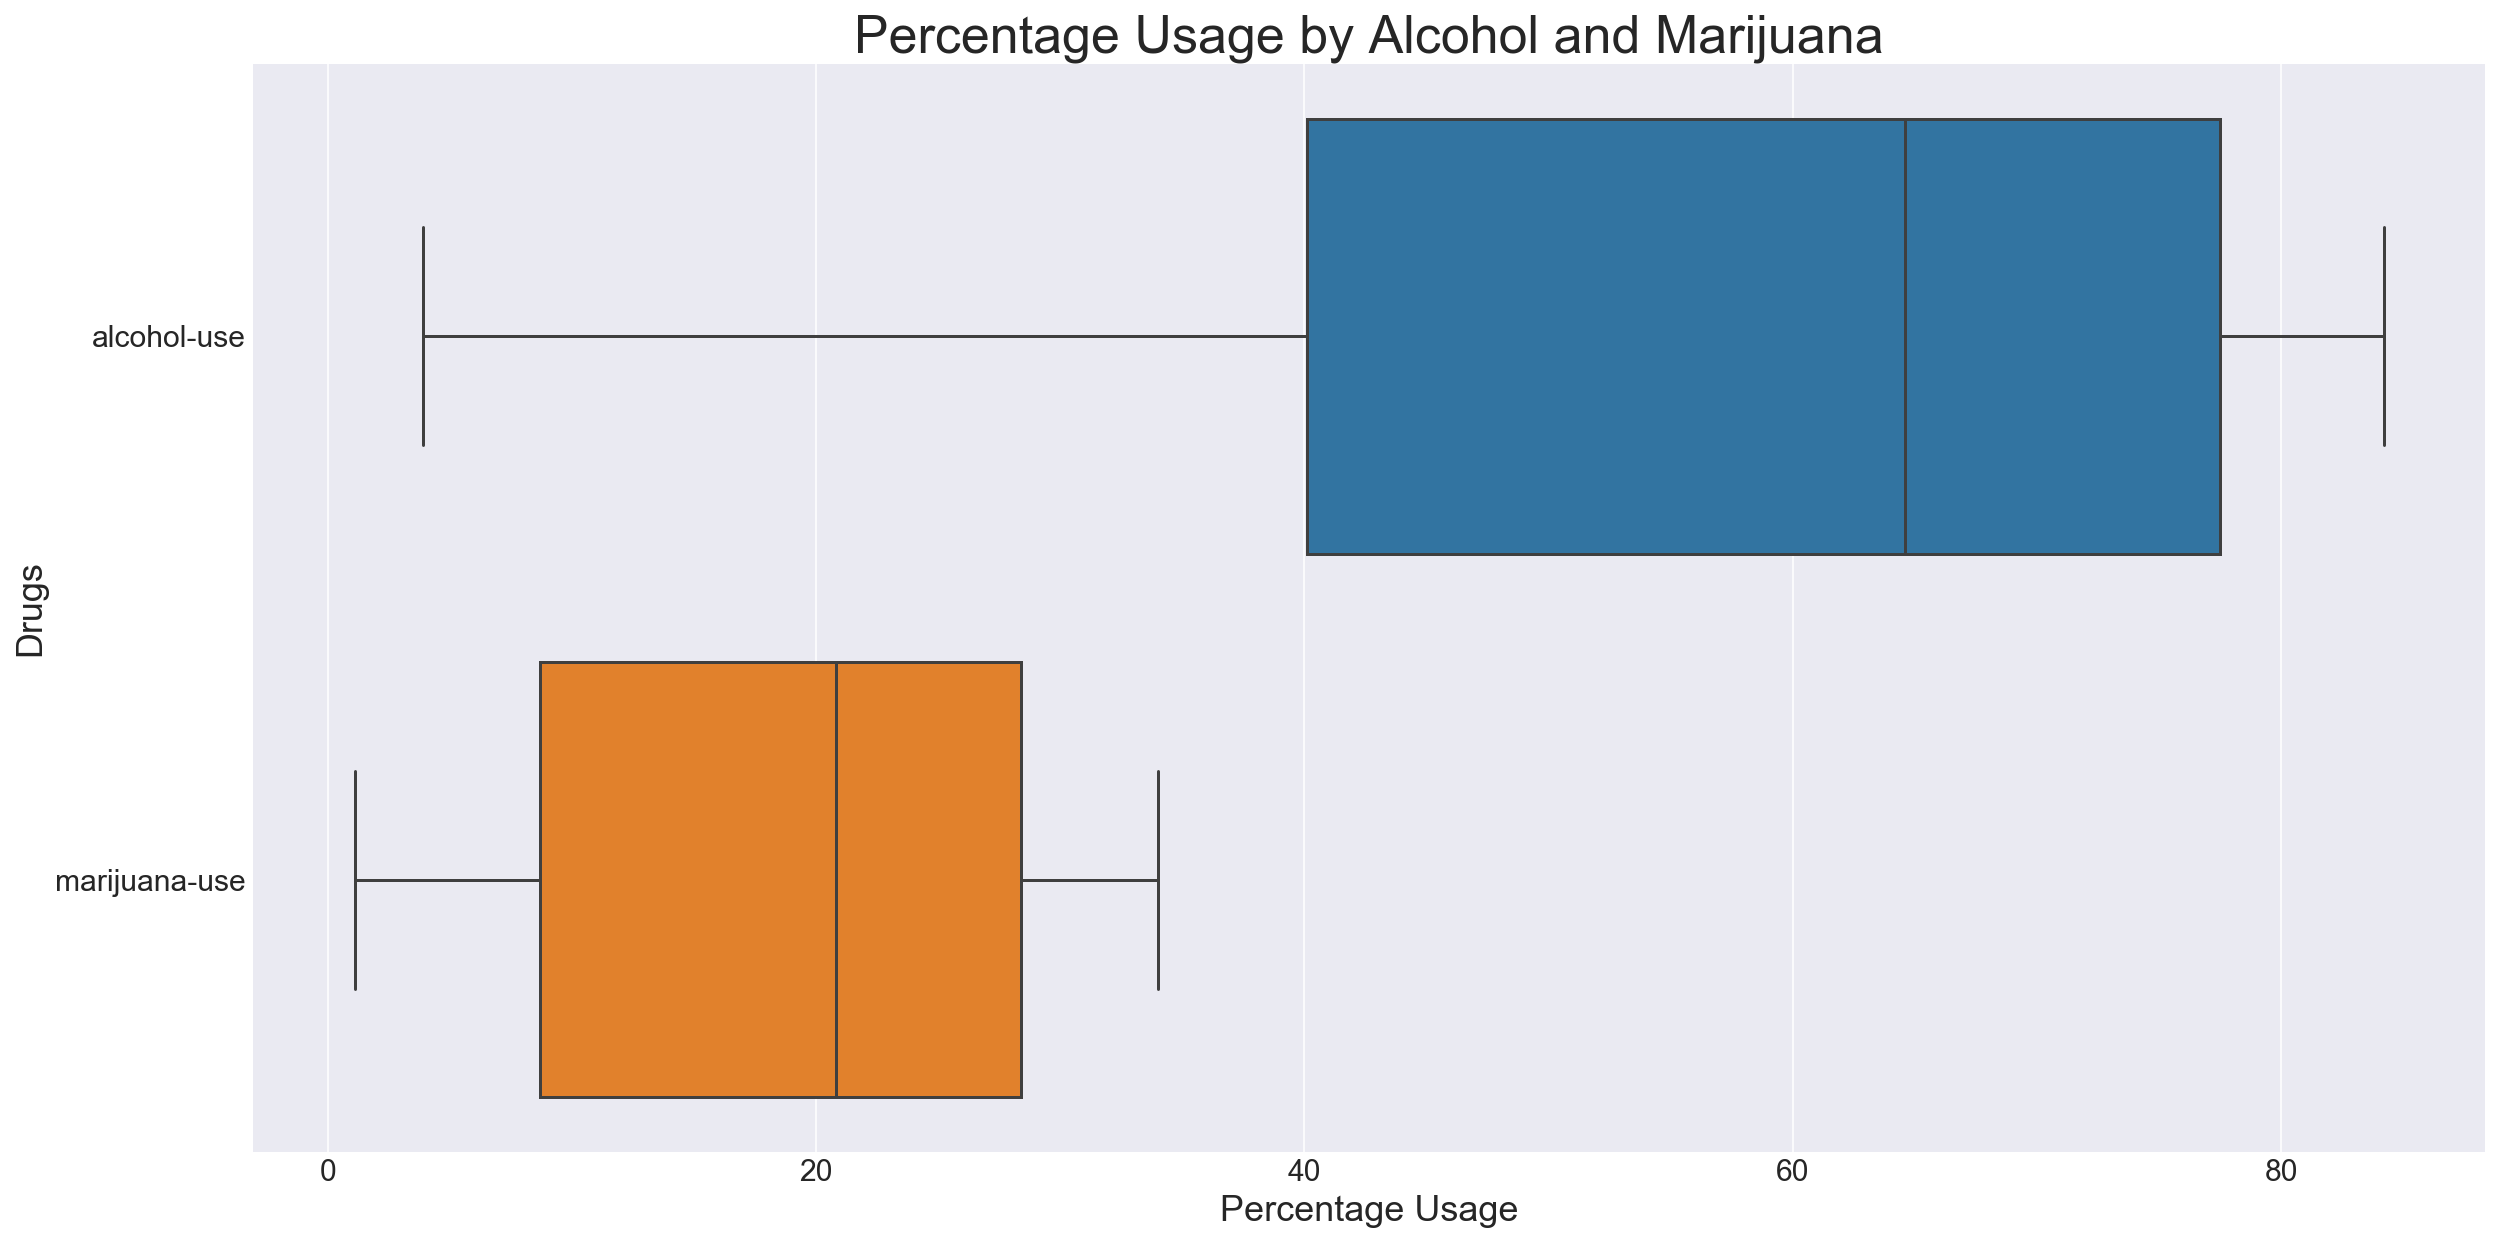

In [41]:
# boxplot for alcohol-use and marijuana-use
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(data=druguse_am,orient='h')

ax.set_title('Percentage Usage by Alcohol and Marijuana',fontsize=26)
ax.set_xlabel('Percentage Usage',fontsize=18)
ax.set_ylabel('Drugs',fontsize=18)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

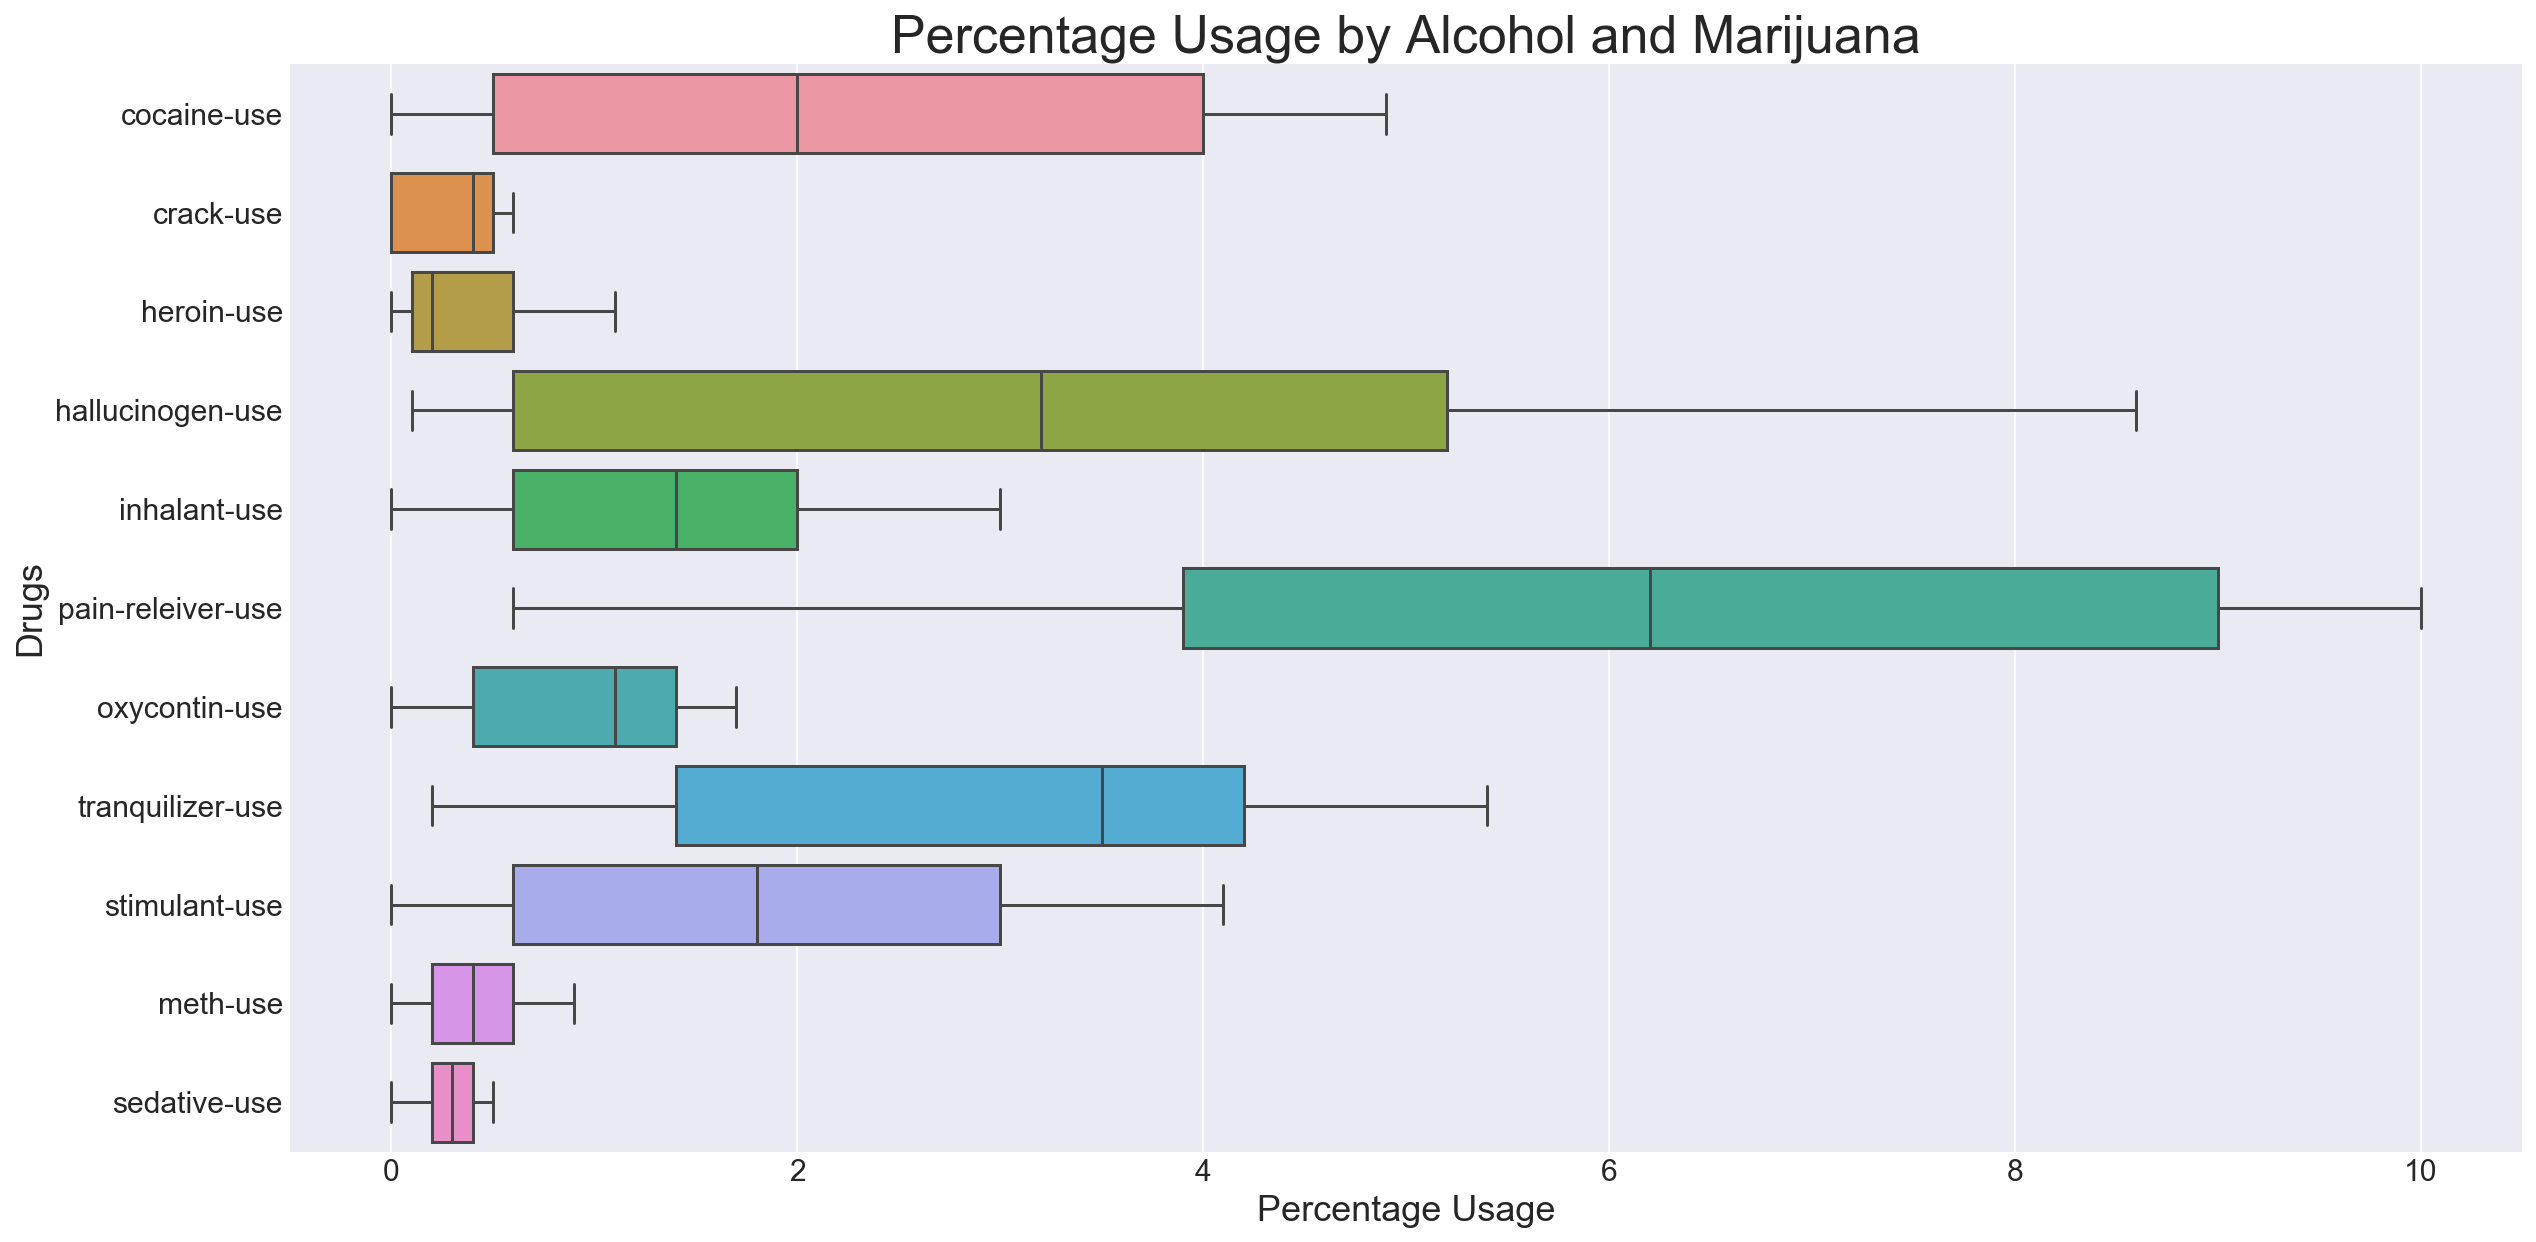

In [42]:
# boxplot for drug-use variables excluding alcohol-use and marijuana-use
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(data=druguse_remaining,orient='h')

ax.set_title('Percentage Usage by Alcohol and Marijuana',fontsize=26)
ax.set_xlabel('Percentage Usage',fontsize=18)
ax.set_ylabel('Drugs',fontsize=18)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

In [43]:
druguse_df.mean().sort_values(ascending=False)

alcohol-use          55.429412
marijuana-use        18.923529
pain-releiver-use     6.270588
hallucinogen-use      3.394118
tranquilizer-use      2.805882
cocaine-use           2.176471
stimulant-use         1.917647
inhalant-use          1.388235
oxycontin-use         0.935294
meth-use              0.382353
heroin-use            0.352941
crack-use             0.294118
sedative-use          0.282353
dtype: float64

In [44]:
druguse_df.median().sort_values(ascending=False)

alcohol-use          64.6
marijuana-use        20.8
pain-releiver-use     6.2
tranquilizer-use      3.5
hallucinogen-use      3.2
cocaine-use           2.0
stimulant-use         1.8
inhalant-use          1.4
oxycontin-use         1.1
meth-use              0.4
crack-use             0.4
sedative-use          0.3
heroin-use            0.2
dtype: float64

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


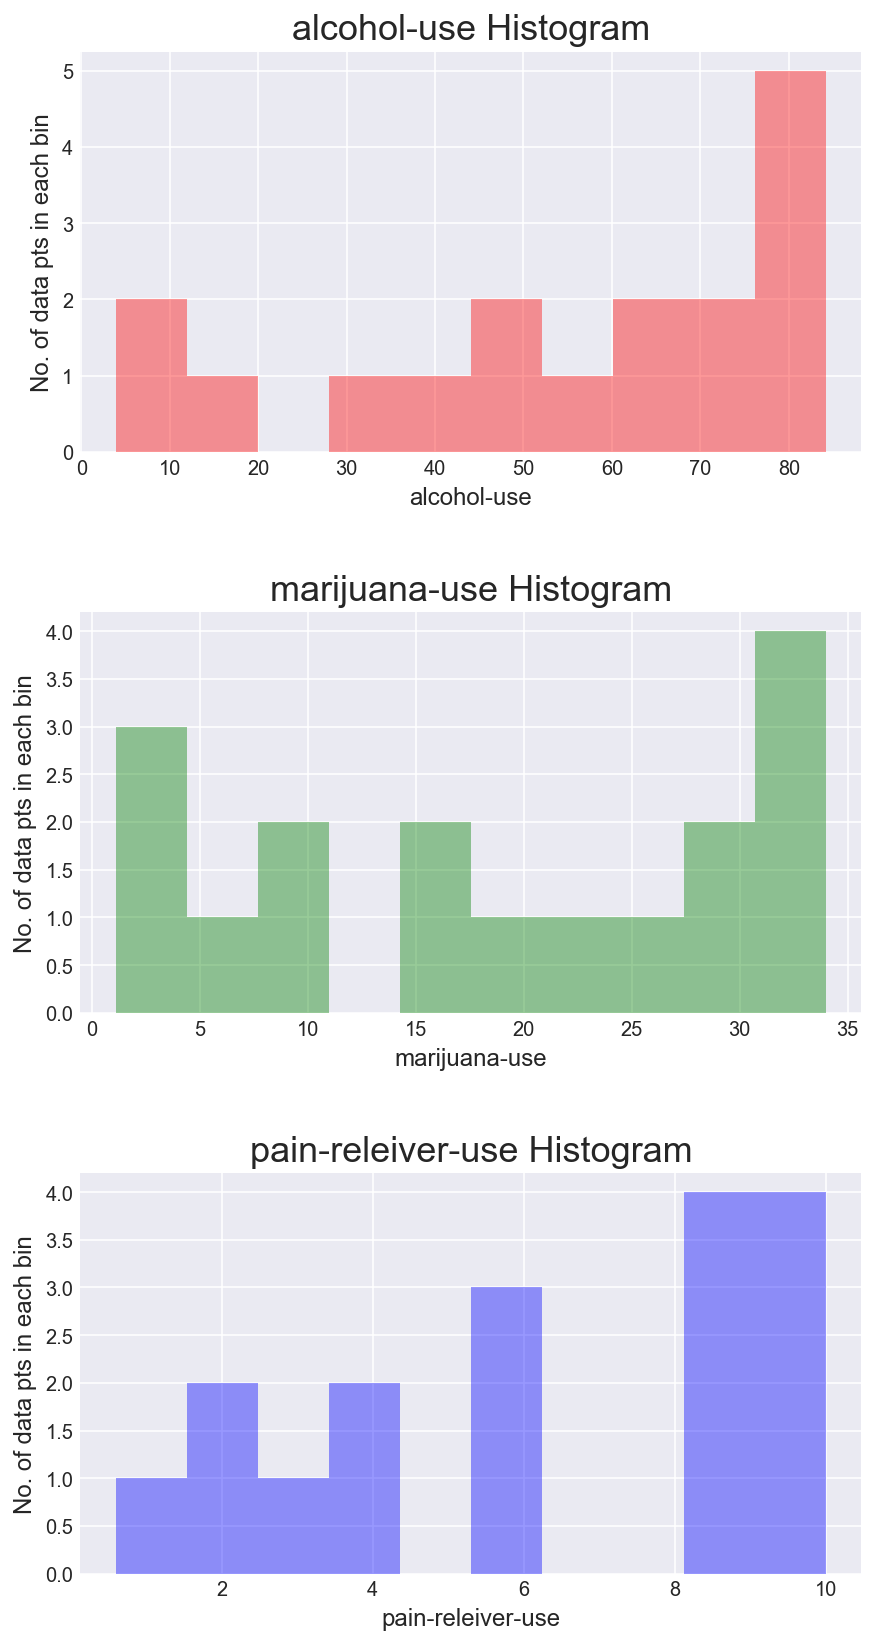

In [45]:
# plotting histograms for the top 3 drugs in druguse_df 
fig, axs = plt.subplots(3,1,figsize=(7,14))
fig.subplots_adjust(hspace=0.4) # adjusting the horizontal spacing between subplots

drug_header = []

for col in ['alcohol','marijuana','pain-releiver']:
    drug_header.append(col+'-use')
    
colors = ['red','green','blue']
count = 0

for col,color in zip(drug_header,colors):
    sns.distplot(druguse_df[col],bins=10,kde=False,ax=axs[count],color=color)
    count += 1
    
count = 0

for num, col in zip(range(3),drug_header):
    axs[num].set_title(col+' Histogram',fontsize=18)
    axs[num].set_xlabel(col,fontsize=12)
    axs[num].set_ylabel('No. of data pts in each bin',fontsize=12)

In [46]:
drug_header

['alcohol-use', 'marijuana-use', 'pain-releiver-use']

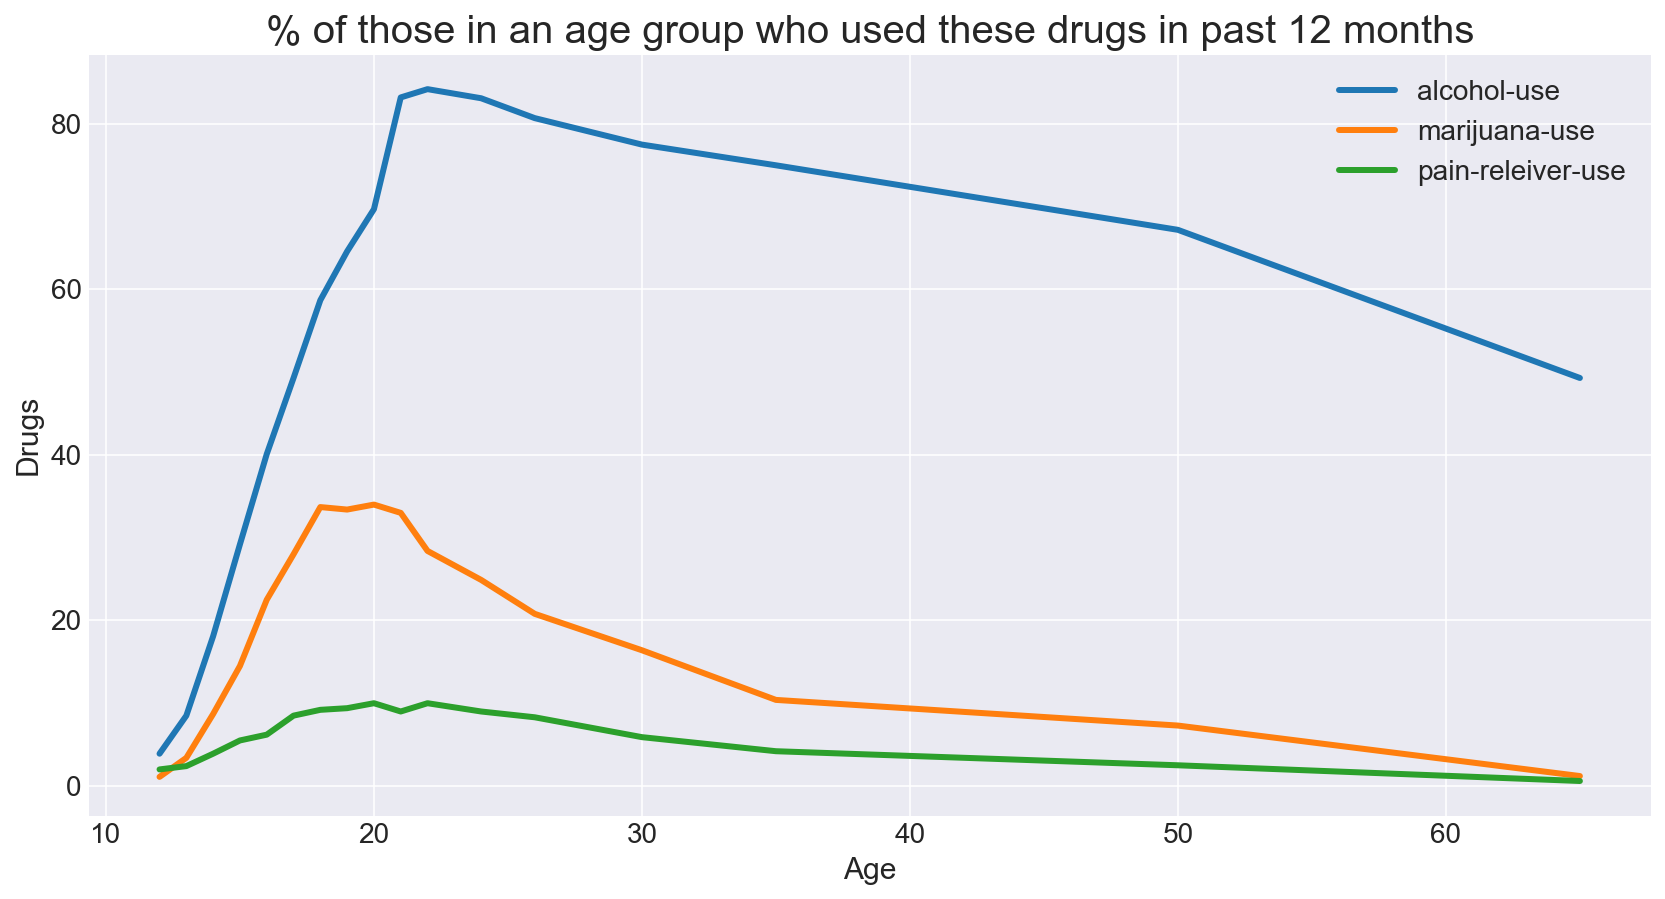

In [47]:
# plotting top 3 drugs by use against 'age'
fig, ax = plt.subplots(figsize=(14,7))

for col in drug_header:
    ax.plot(drug_df['age'],drug_df[col],lw=3)

ax.set_title('% of those in an age group who used these drugs in past 12 months',fontsize=20)
ax.set_xlabel('Age',fontsize=15)
ax.set_ylabel('Drugs',fontsize=15)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

ax.legend(fontsize=14)

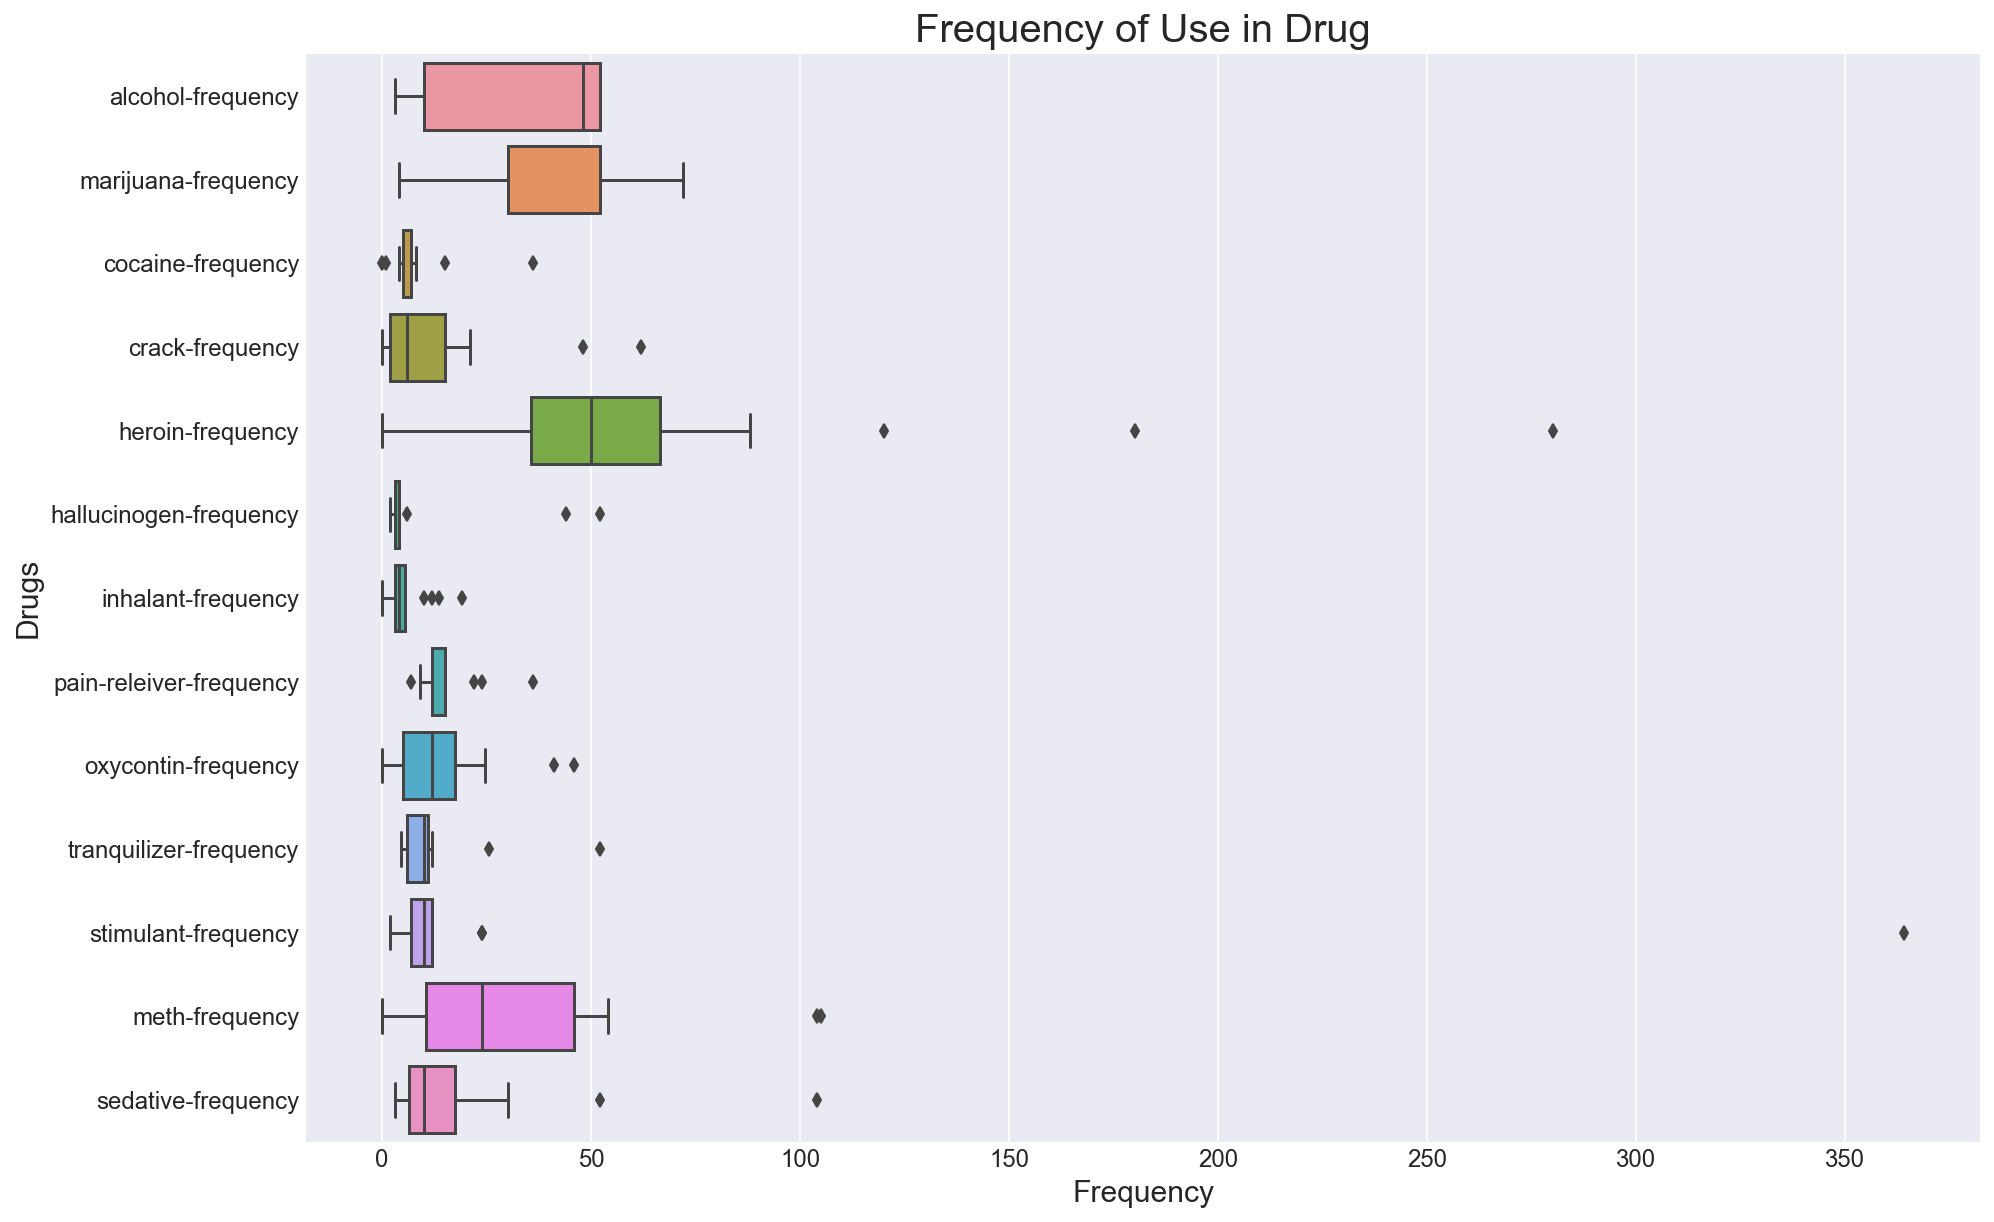

In [48]:
# boxplot for drugfreq_df
fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot(data=drugfreq_df,orient='h')

ax.set_title('Frequency of Use in Drug',fontsize=20)
ax.set_xlabel('Frequency',fontsize=15)
ax.set_ylabel('Drugs',fontsize=15)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

In [49]:
# separating alcohol-frequency, marijuana-frequency, heroin-frequency and meth-frequency from the rest of drug-frequency 
# variables. this is done for drug-frequency boxplot analysis
drugfreq_hs = drugfreq_df[['alcohol-frequency','marijuana-frequency','heroin-frequency','meth-frequency']]
drugfreq_remaining = drugfreq_df.drop(['alcohol-frequency','marijuana-frequency','heroin-frequency','meth-frequency'],axis=1)

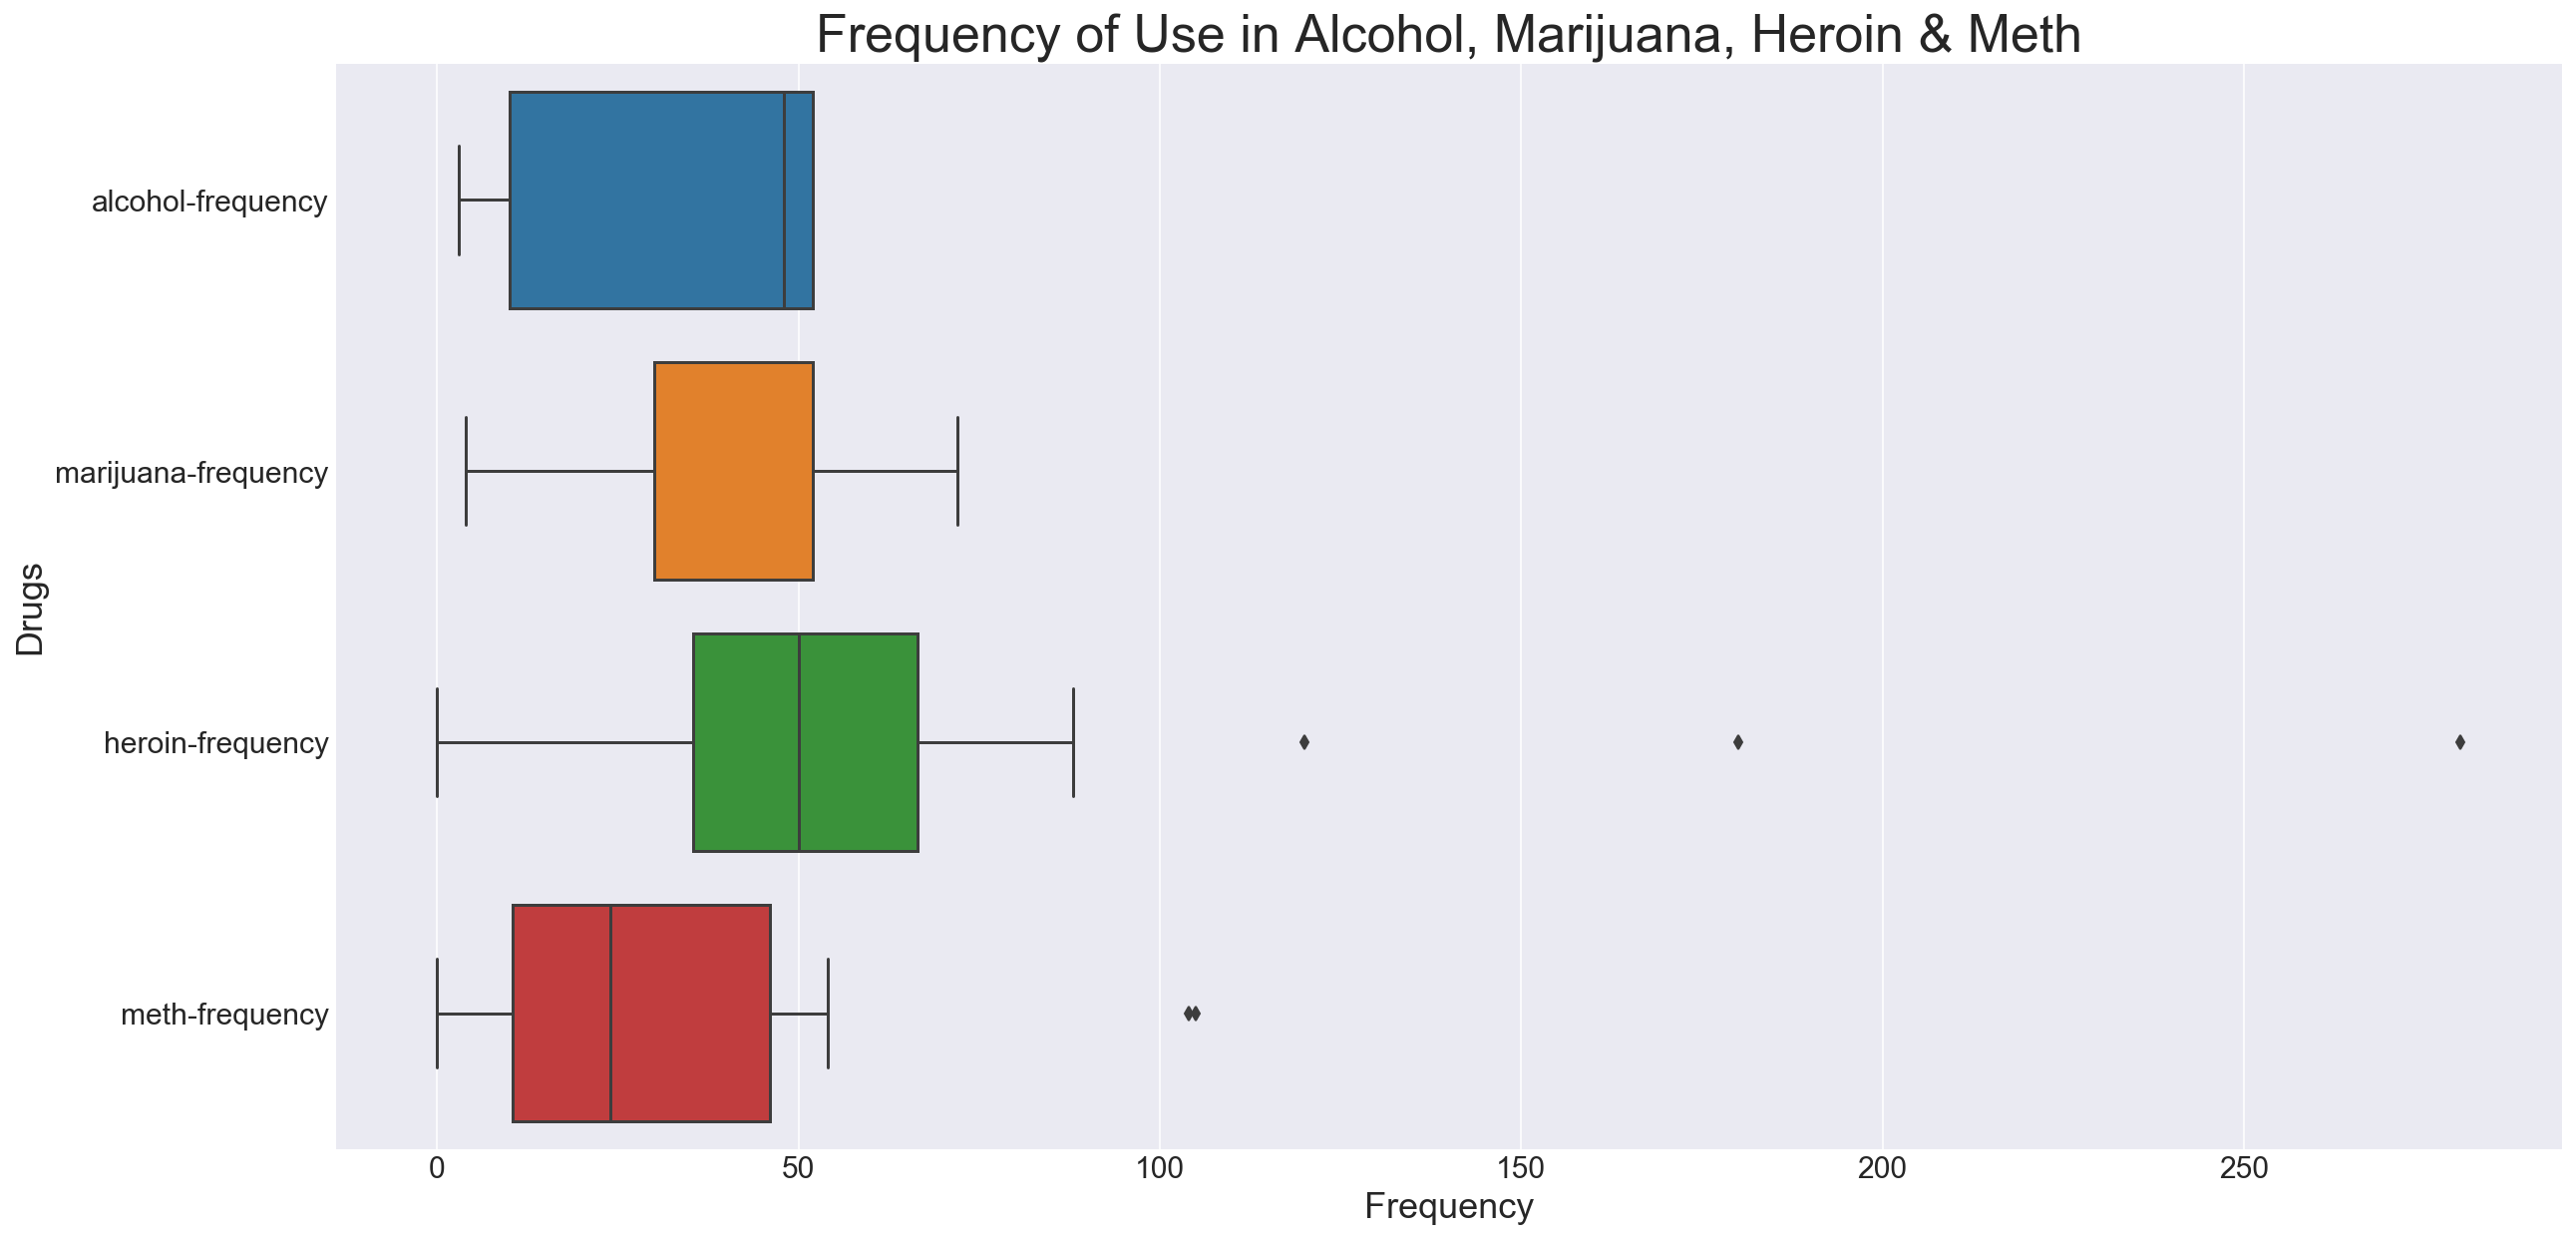

In [50]:
# boxplot for alcohol, marijuana, heroin and meth frequency
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(data=drugfreq_hs,orient='h')

ax.set_title('Frequency of Use in Alcohol, Marijuana, Heroin & Meth',fontsize=26)
ax.set_xlabel('Frequency',fontsize=18)
ax.set_ylabel('Drugs',fontsize=18)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

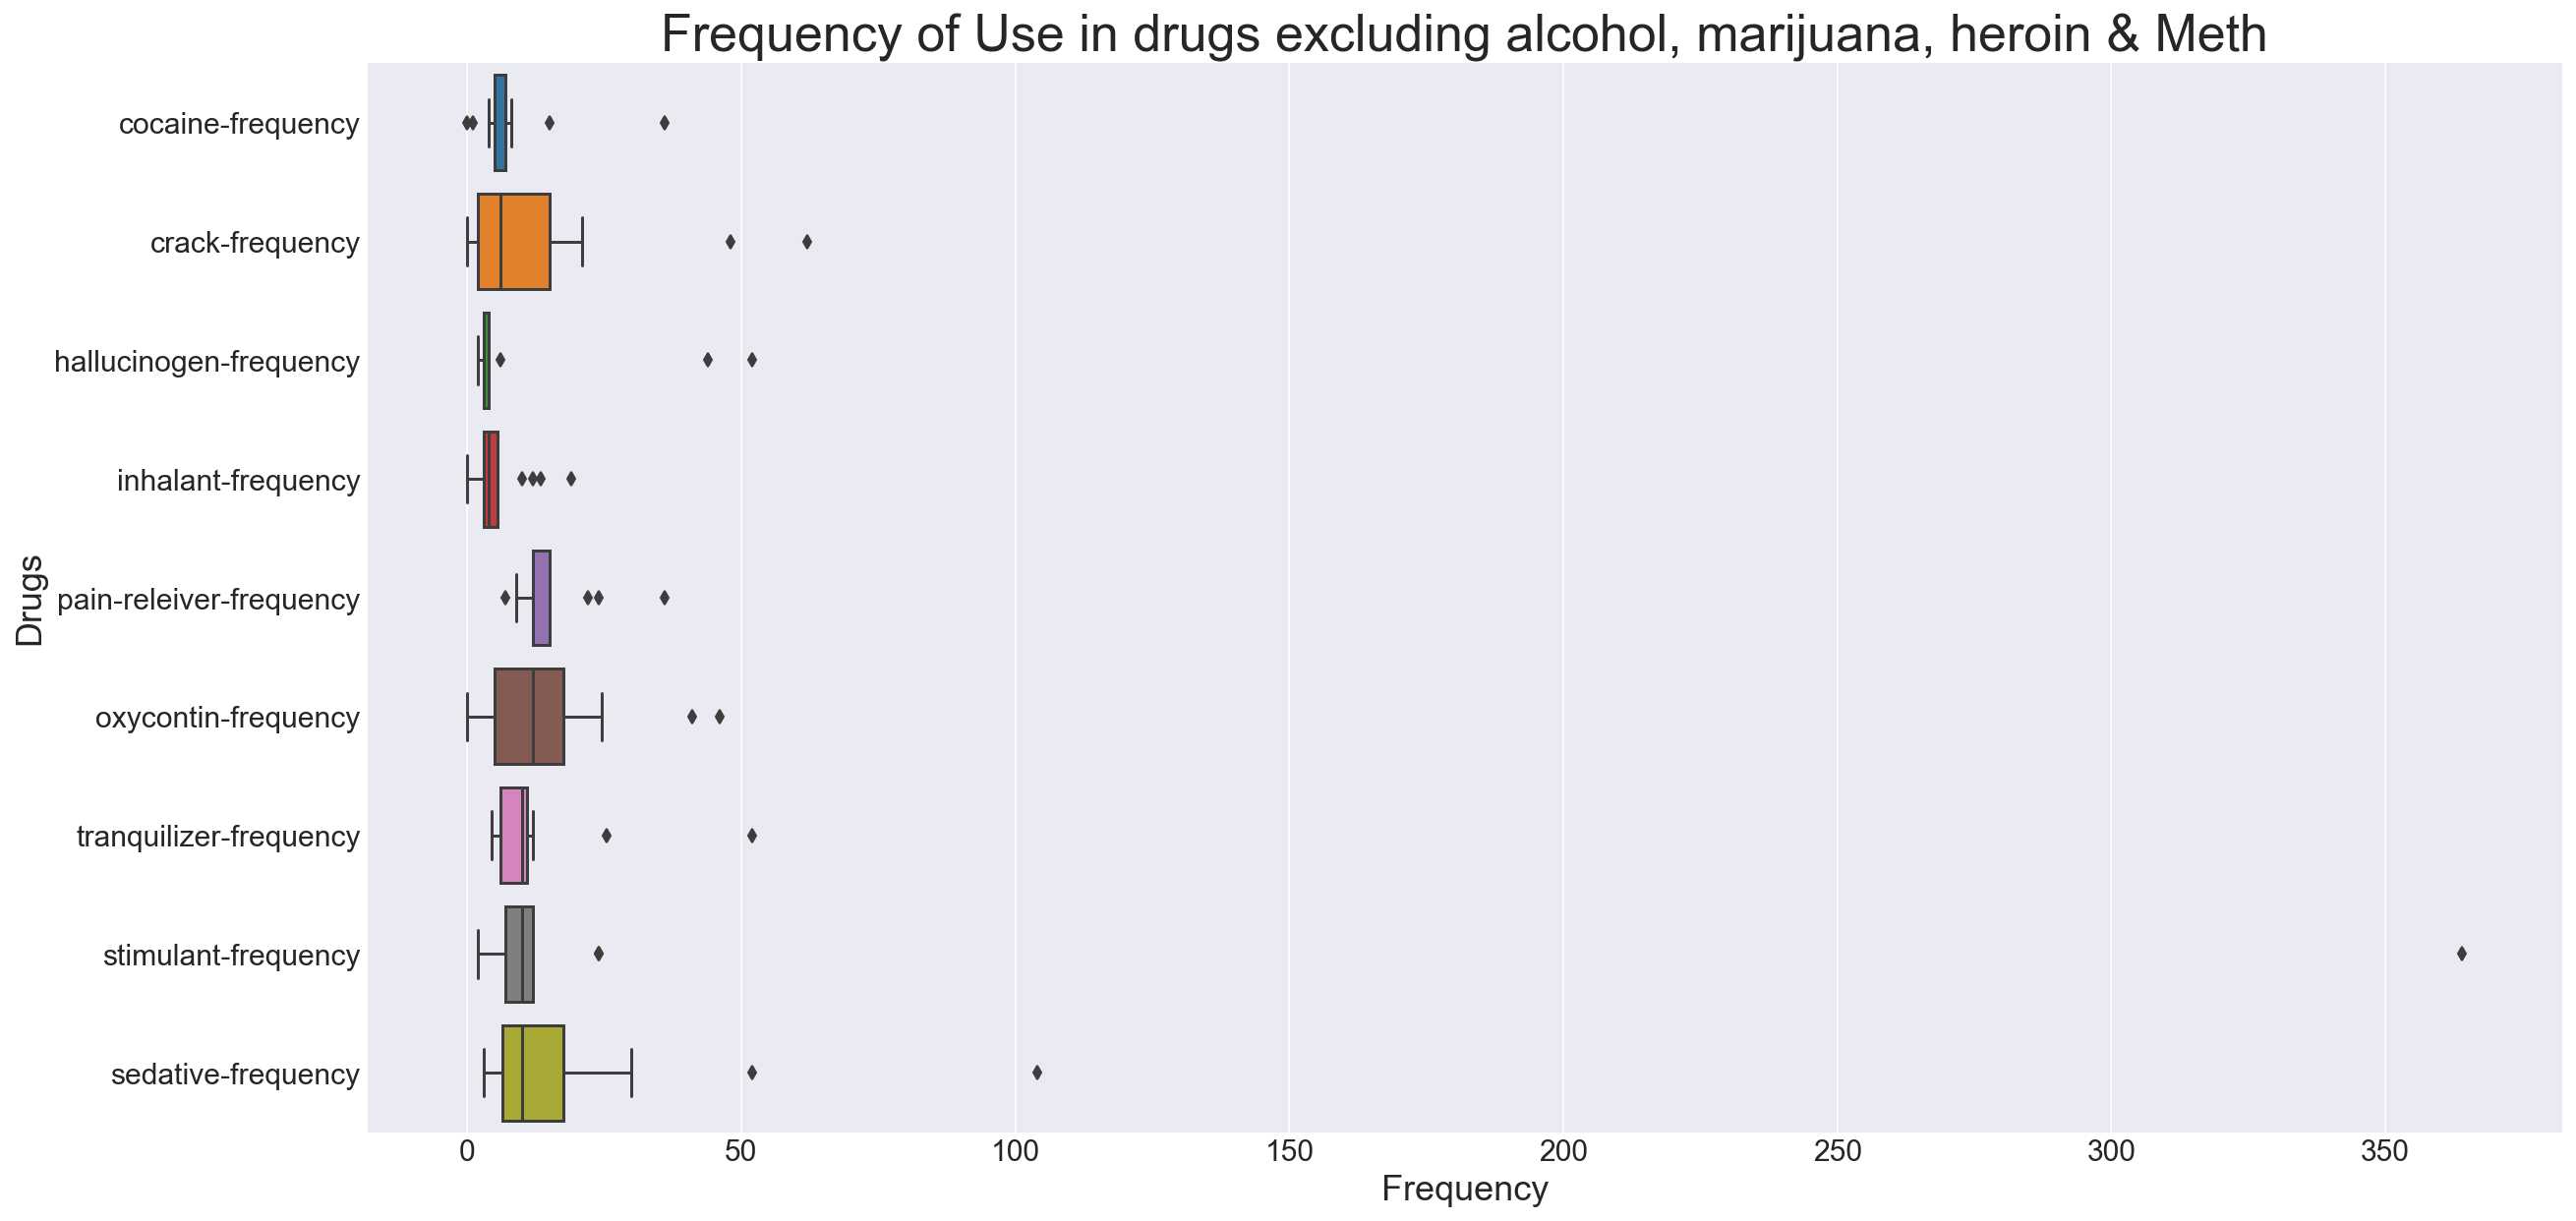

In [51]:
# boxplot for drug-use variables excluding alcohol-use and marijuana-use
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(data=drugfreq_remaining,orient='h')

ax.set_title('Frequency of Use in drugs excluding alcohol, marijuana, \
heroin & Meth',fontsize=26)
ax.set_xlabel('Frequency',fontsize=18)
ax.set_ylabel('Drugs',fontsize=18)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

In [52]:
# including column 'age' into druguse_df and drugfreq_df
# both dataframes will be used for line plots subsequently
druguse_age_df = pd.concat([drug_df['age'],druguse_df],axis=1)
drugfreq_age_df = pd.concat([drug_df['age'],drugfreq_df],axis=1)

druguse_age_df.rename(columns={0:'age'},inplace=True)
drugfreq_age_df.rename(columns={0:'age'},inplace=True)

In [53]:
drugfreq_df.mean().sort_values(ascending=False)

heroin-frequency           68.970588
marijuana-frequency        42.941176
alcohol-frequency          33.352941
meth-frequency             31.735294
stimulant-frequency        31.147059
sedative-frequency         19.382353
pain-releiver-frequency    14.705882
oxycontin-frequency        13.941176
crack-frequency            12.382353
tranquilizer-frequency     11.735294
hallucinogen-frequency      8.411765
cocaine-frequency           7.411765
inhalant-frequency          5.794118
dtype: float64

In [54]:
drugfreq_df.median().sort_values(ascending=False)

marijuana-frequency        52.0
heroin-frequency           50.0
alcohol-frequency          48.0
meth-frequency             24.0
oxycontin-frequency        12.0
pain-releiver-frequency    12.0
sedative-frequency         10.0
stimulant-frequency        10.0
tranquilizer-frequency     10.0
crack-frequency             6.0
cocaine-frequency           5.0
inhalant-frequency          4.0
hallucinogen-frequency      3.0
dtype: float64

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


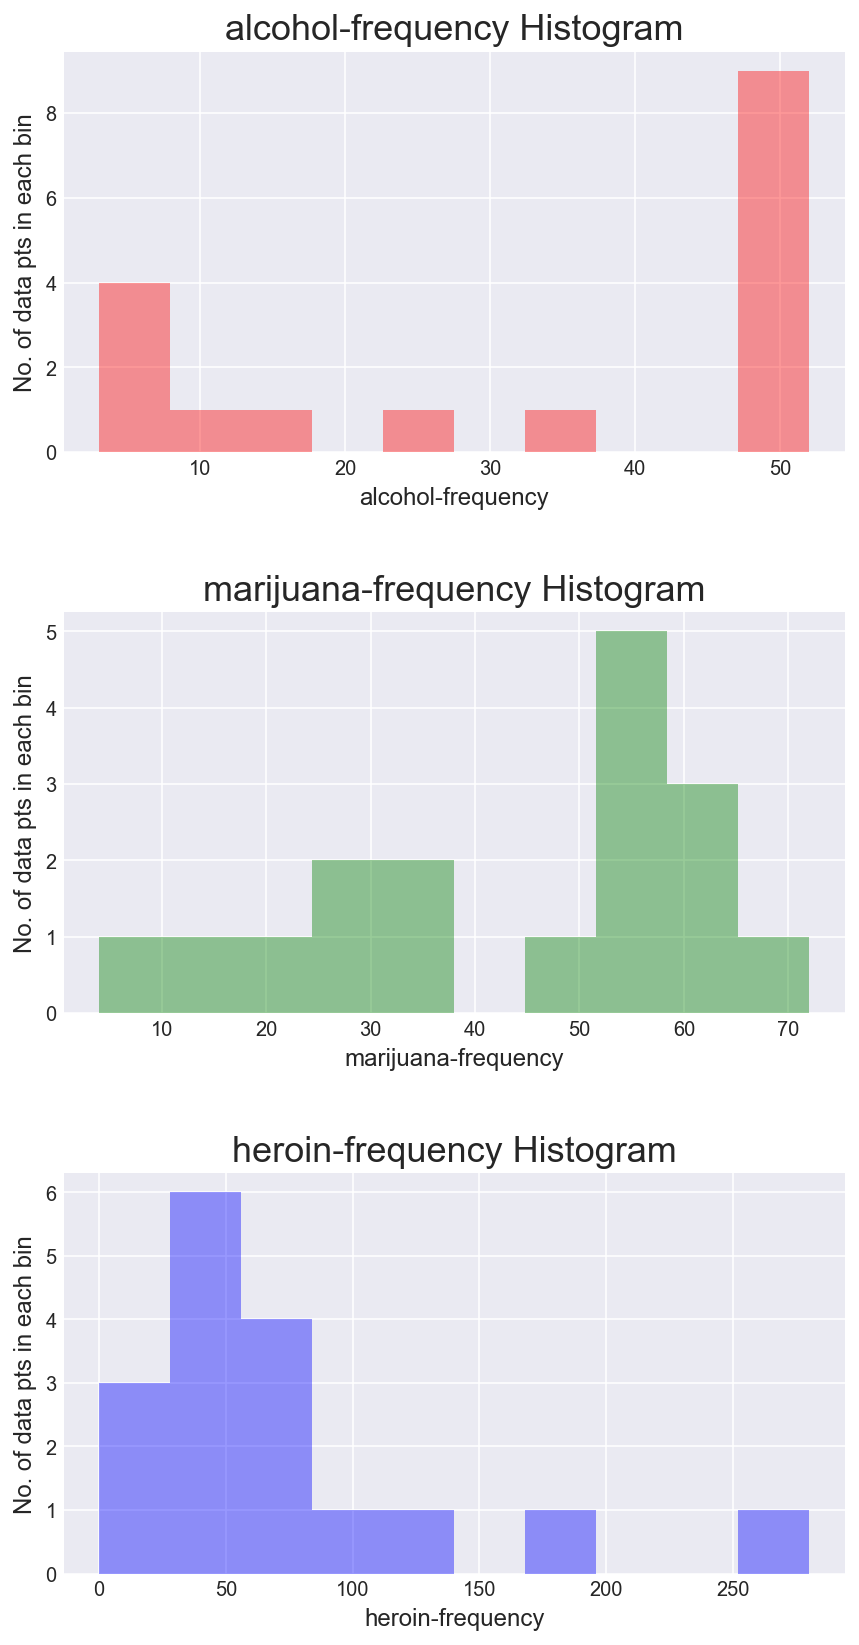

In [55]:
# plotting histograms for the top 3 drugs in drugfreq_df
fig, axs = plt.subplots(3,1,figsize=(7,14))
fig.subplots_adjust(hspace=0.4) # adjusting the horizontal spacing between subplots

drug_header = []

for col in ['alcohol','marijuana','heroin']:
    drug_header.append(col+'-frequency')
    
colors = ['red','green','blue']
count = 0

for col,color in zip(drug_header,colors):
    sns.distplot(drugfreq_df[col],bins=10,kde=False,ax=axs[count],color=color)
    count += 1
    
count = 0

for num, col in zip(range(3),drug_header):
    axs[num].set_title(col+' Histogram',fontsize=18)
    axs[num].set_xlabel(col,fontsize=12)
    axs[num].set_ylabel('No. of data pts in each bin',fontsize=12)

In [56]:
drug_header

['alcohol-frequency', 'marijuana-frequency', 'heroin-frequency']

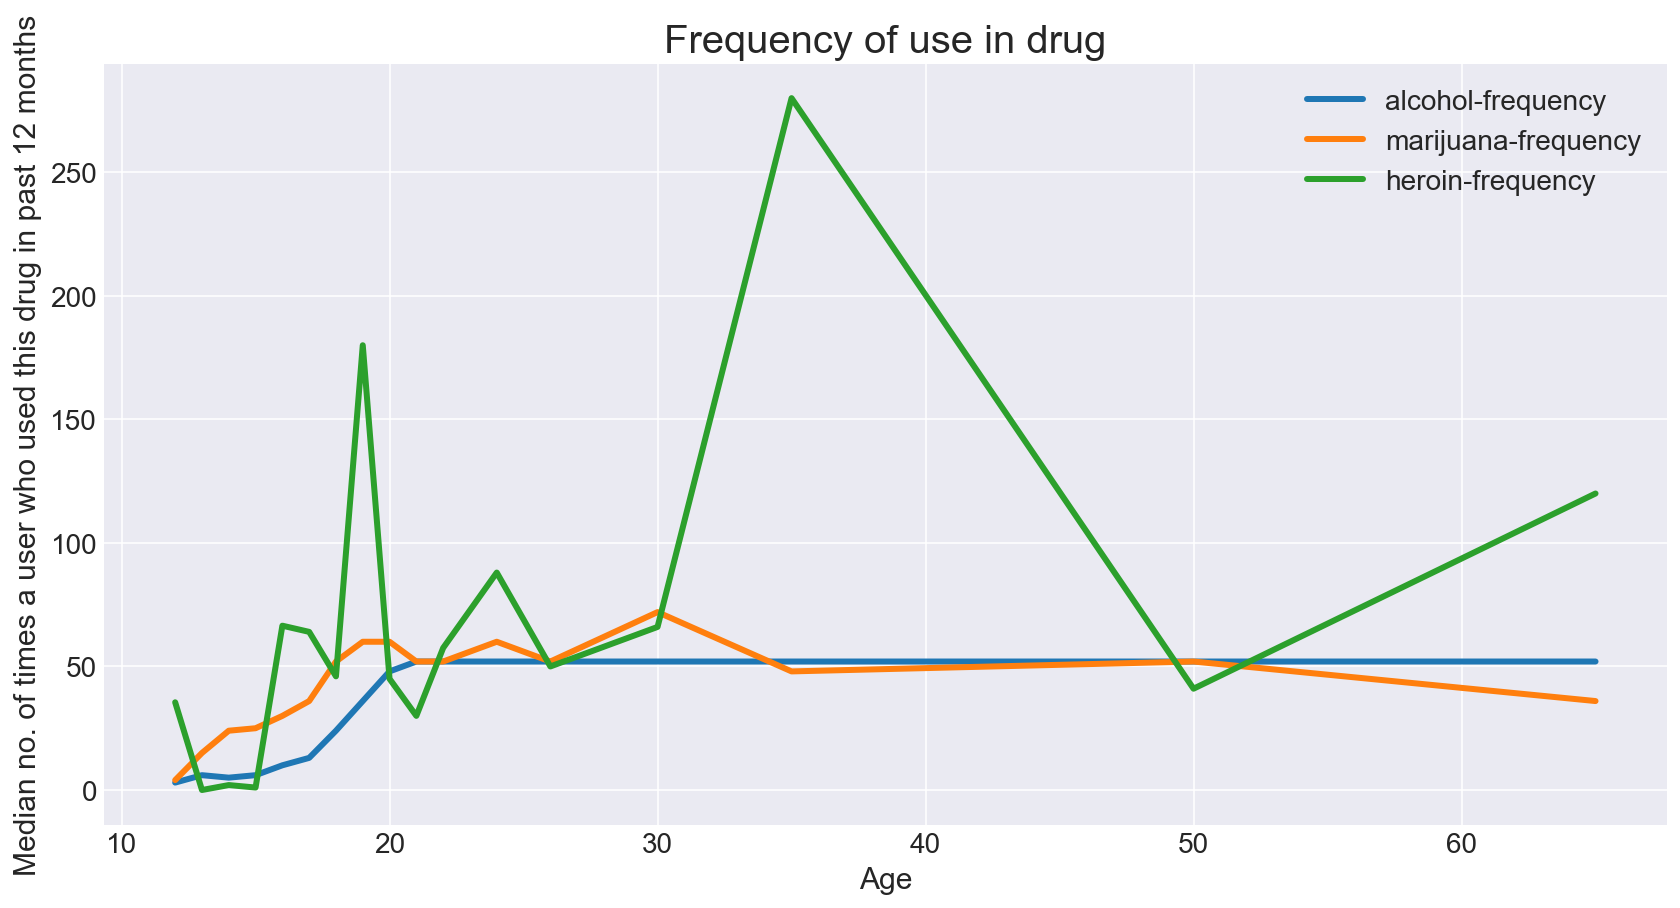

In [57]:
# plotting top 3 drugs by frequency against 'age'
fig, ax = plt.subplots(figsize=(14,7))

for col in drug_header:
    ax.plot(drugfreq_age_df['age'],drug_df[col],lw=3)

ax.set_title('Frequency of use in drug',fontsize=20)
ax.set_xlabel('Age',fontsize=15)
ax.set_ylabel('Median no. of times a user who used this drug in past 12 months',fontsize=15)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

ax.legend(fontsize=14)

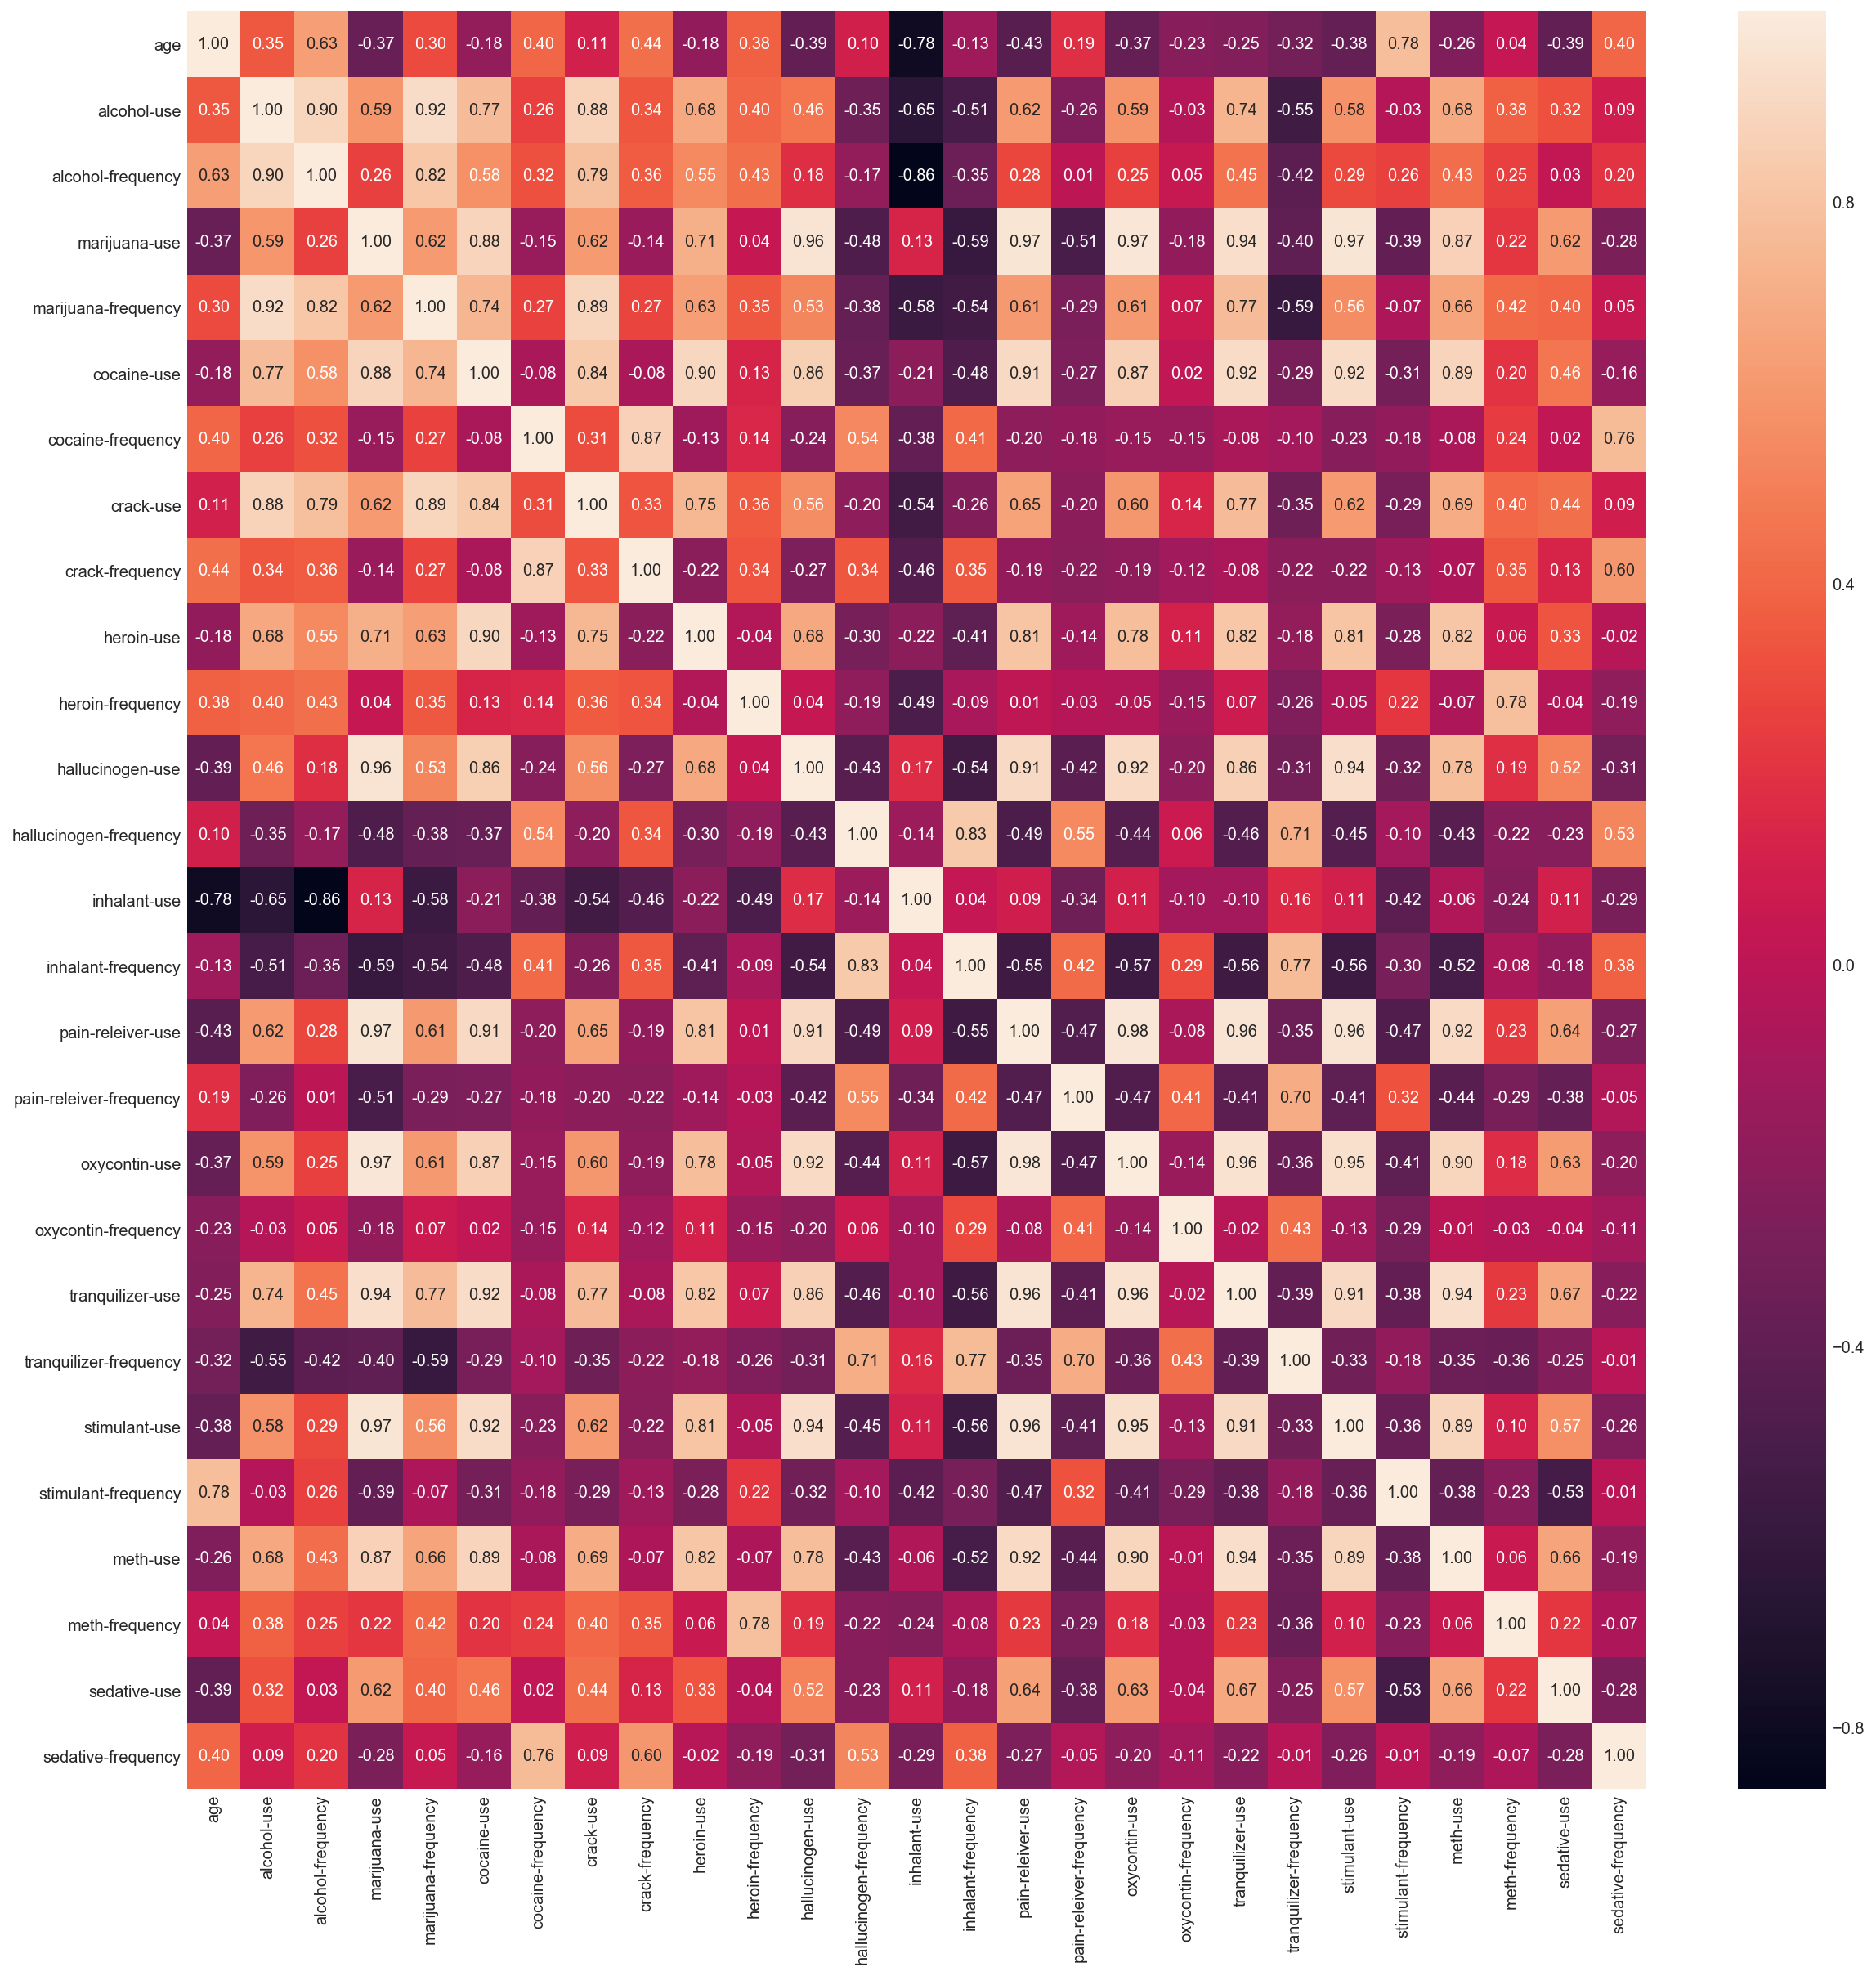

In [58]:
# heat map for drug_df
fig, ax = plt.subplots(figsize=(20,20))

drug_df_hm = sns.heatmap(drug_df.corr(),annot=True,fmt='.2f')

In [59]:
# removing correlation pairs that are duplicates and pairs 
drug_dfcorr = drug_df.corr()
drug_dfcorr = drug_dfcorr.mask(np.tril(np.ones(drug_dfcorr.shape)).astype(np.bool))

drug_dfcorr = drug_dfcorr.stack().reset_index()
drug_dfcorr.rename(columns={'level_0':'x','level_1':'y',0:'corrcoef'},inplace=True)

In [60]:
# sort the drug_dfcorr by correlation coefficients in ascending order
drug_dfcorr = drug_dfcorr.sort_values('corrcoef')

# ranking 10 x-y variables exhibiting strongest positive correlation
top10_poscorr = drug_dfcorr[::-1][0:10]

# ranking 10 x-y variables exhibiting strongest negative correlation
top10_negcorr = drug_dfcorr[0:10]

In [61]:
top10_poscorr

,x,y,corrcoef
286,pain-releiver-use,oxycontin-use,0.976445
88,marijuana-use,oxycontin-use,0.971733
92,marijuana-use,stimulant-use,0.968096
86,marijuana-use,pain-releiver-use,0.966226
290,pain-releiver-use,stimulant-use,0.961484
82,marijuana-use,hallucinogen-use,0.959353
288,pain-releiver-use,tranquilizer-use,0.959283
307,oxycontin-use,tranquilizer-use,0.955081
309,oxycontin-use,stimulant-use,0.947492
240,hallucinogen-use,stimulant-use,0.940008


In [62]:
top10_negcorr

,x,y,corrcoef
61,alcohol-frequency,inhalant-use,-0.864153
12,age,inhalant-use,-0.784329
37,alcohol-use,inhalant-use,-0.648248
113,marijuana-frequency,tranquilizer-frequency,-0.591449
85,marijuana-use,inhalant-frequency,-0.588462
106,marijuana-frequency,inhalant-use,-0.577792
275,inhalant-frequency,oxycontin-use,-0.567704
279,inhalant-frequency,stimulant-use,-0.564635
277,inhalant-frequency,tranquilizer-use,-0.557208
273,inhalant-frequency,pain-releiver-use,-0.551318


In [63]:
# value_counts for x-y variables in top10_poscorr df
print(top10_poscorr['x'].value_counts(),'\n')
print(top10_poscorr['y'].value_counts())

marijuana-use        4
pain-releiver-use    3
oxycontin-use        2
hallucinogen-use     1
Name: x, dtype: int64 

stimulant-use        4
tranquilizer-use     2
oxycontin-use        2
pain-releiver-use    1
hallucinogen-use     1
Name: y, dtype: int64


In [64]:
# value_counts for x-y variables in top10_negcorr df
print(top10_negcorr['x'].value_counts(),'\n')
print(top10_negcorr['y'].value_counts())

inhalant-frequency     4
marijuana-frequency    2
alcohol-use            1
alcohol-frequency      1
age                    1
marijuana-use          1
Name: x, dtype: int64 

inhalant-use              4
tranquilizer-use          1
tranquilizer-frequency    1
oxycontin-use             1
inhalant-frequency        1
pain-releiver-use         1
stimulant-use             1
Name: y, dtype: int64


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

### <font color='blue'> My answer to 7.3:

1. A specific question I would like to answer with the data: <br>
    - Through data analysis conducted earlier, we found out that the top 3 drugs through percentage use (the drug-use variables were ranked using the value of their mean) and the top 3 drugs through frequency (the drug-frequency variables were ranked using the value of their median) are: <br>

        -  For drug-use (mean): alcohol, marijuana and pain reliever <br>
        -  For drug-frequency (median): marijuana, heroin and alcohol <br>

    - As alcohol and marijuana appeared to be the most common drugs based on the finding above, I would like to find out if both drugs are correlated. If they are, I would like to conduct a hypothesis testing to see if their correlation is statistically significant.
    - If we reject the null hypothesis of H0: alcohol and marijuana (use and/or frequency) are uncorrelated, then more focused studies on reducing drug use can be conducted on either drug to effectively reduce usage for both drugs. This is because we understand that reduced usage on alocohol or marijuana will also see a reduction of usage on the other drug. <br>
    
    
2. The deliverables are:
    - To provide visualizations to show the distribution and correlation direction between alcohol and marijuana.
    - To provide statistics and hypothesis testing on the correlation between alcohol and marijuana. <br>
    
    
3. EDA techniques:
    - These will be provided in the code section (shown below). <br>
    
    
4. Report:
    - This will also be provided in the report section (shown below).

In [65]:
# extracting data on 'age', 'alcohol-use', 'alcohol-frequency', 'marijuana-use'
# and 'marijuana-frequency' from drug_df
drughypo_df = drug_df.iloc[:,:5]

In [66]:
# summary statistics for drughypo_df
drughypo_df.describe()

,age,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,24.529412,55.429412,33.352941,18.923529,42.941176
std,14.058439,26.878866,21.318833,11.959752,18.362566
min,12.000000,3.900000,3.000000,1.100000,4.000000
25%,16.000000,40.100000,10.000000,8.700000,30.000000
50%,20.000000,64.600000,48.000000,20.800000,52.000000
75%,26.000000,77.500000,52.000000,28.400000,52.000000
max,65.000000,84.200000,52.000000,34.000000,72.000000


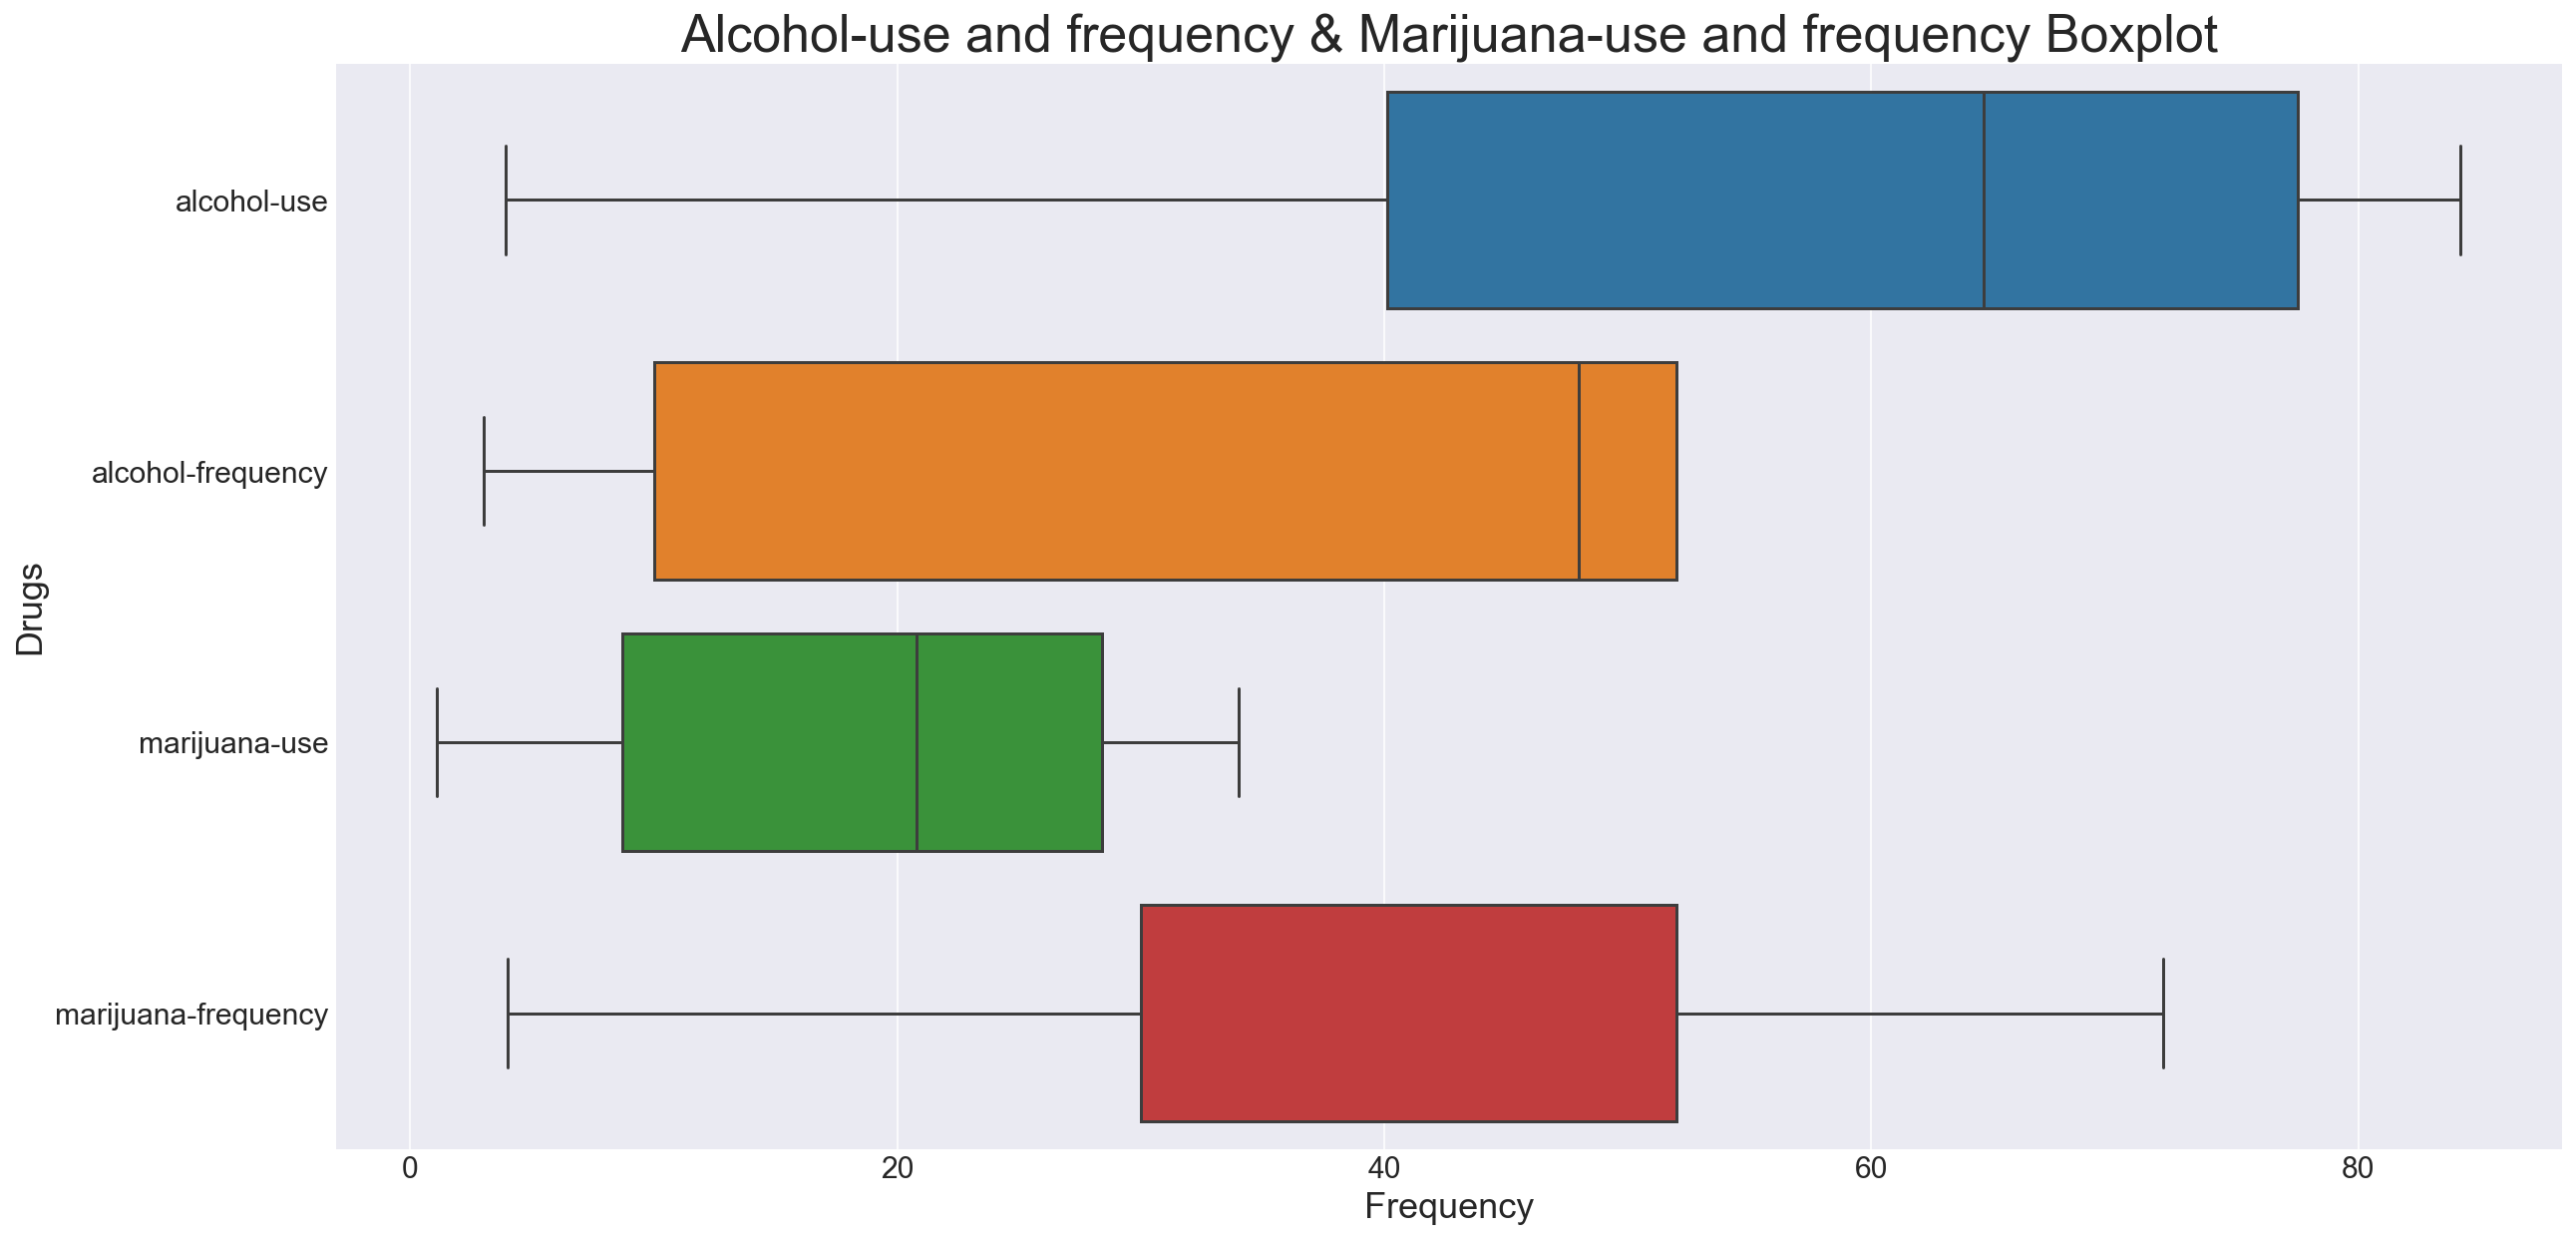

In [67]:
# box plots for drughypo_df
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(data=drughypo_df.iloc[:,1:],orient='h')

ax.set_title('Alcohol-use and frequency & Marijuana-use and frequency Boxplot', \
             fontsize=26)
ax.set_xlabel('Frequency',fontsize=18)
ax.set_ylabel('Drugs',fontsize=18)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

In [68]:
drughypo_df.head(2)

,age,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency
0,12.0,3.9,3.0,1.1,4.0
1,13.0,8.5,6.0,3.4,15.0


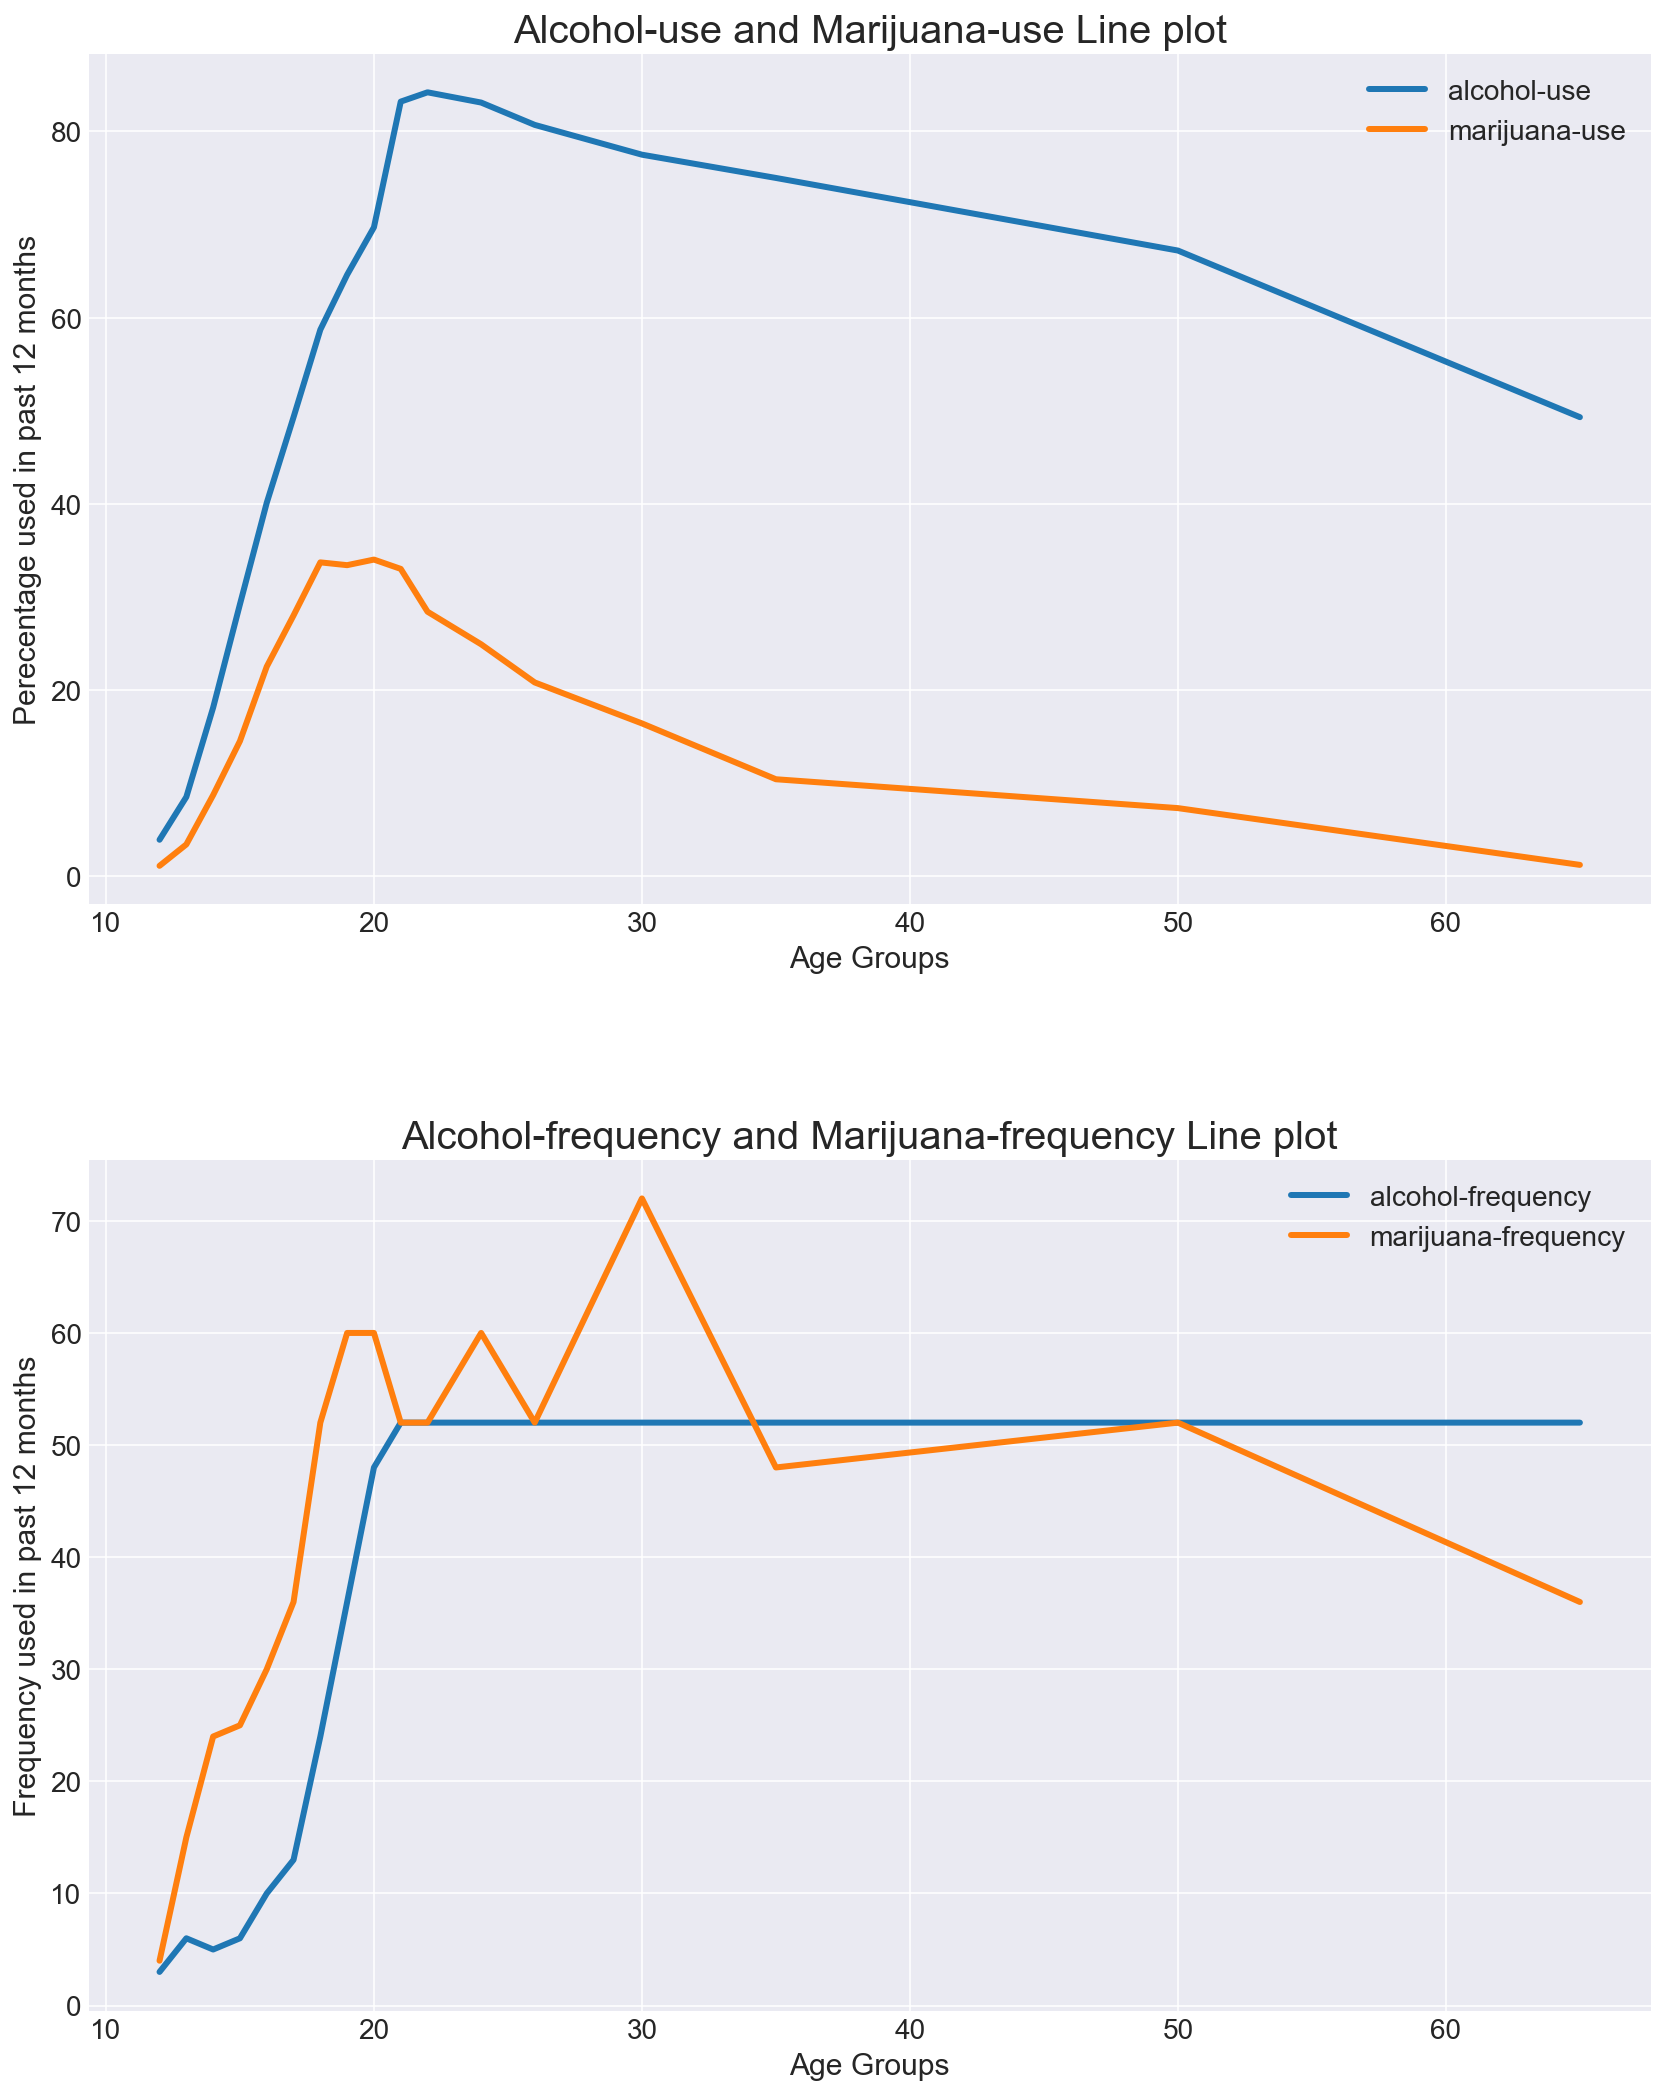

In [69]:
# line plots for drughypo_df for percentage use and frequencies
fig, ax = plt.subplots(2,1,figsize=(14,18))
plt.subplots_adjust(hspace=0.3)

ax[0].plot(drughypo_df['age'],drughypo_df['alcohol-use'],lw=3)
ax[0].plot(drughypo_df['age'],drughypo_df['marijuana-use'],lw=3)

ax[0].set_title('Alcohol-use and Marijuana-use Line plot',fontsize=20)
ax[0].set_xlabel('Age Groups',fontsize=15)
ax[0].set_ylabel('Perecentage used in past 12 months',fontsize=15)

ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)

ax[0].legend(fontsize=14)


ax[1].plot(drughypo_df['age'],drughypo_df['alcohol-frequency'],lw=3)
ax[1].plot(drughypo_df['age'],drughypo_df['marijuana-frequency'],lw=3)

ax[1].set_title('Alcohol-frequency and Marijuana-frequency Line plot',fontsize=20)
ax[1].set_xlabel('Age Groups',fontsize=15)
ax[1].set_ylabel('Frequency used in past 12 months',fontsize=15)

ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)

ax[1].legend(fontsize=14)

### <font color='blue'> Observations from the distribution above:

1) The distribution above shows that alcohol and marijuana (in terms of percentage usage and frequency) increase exponentially as we move from age groups of 12 to mid-20s.<br>

2) Although the percentage use of both drugs fall as move across to older age groups, we note that their consumption frequencies only dropped a little. For alcohol-frequency it actually remained constant for age groups starting from early-20s to age group of 65+.

#### - Conclusion: alcohol and marijuana use across all age groups is a prevalent issue across all age groups.

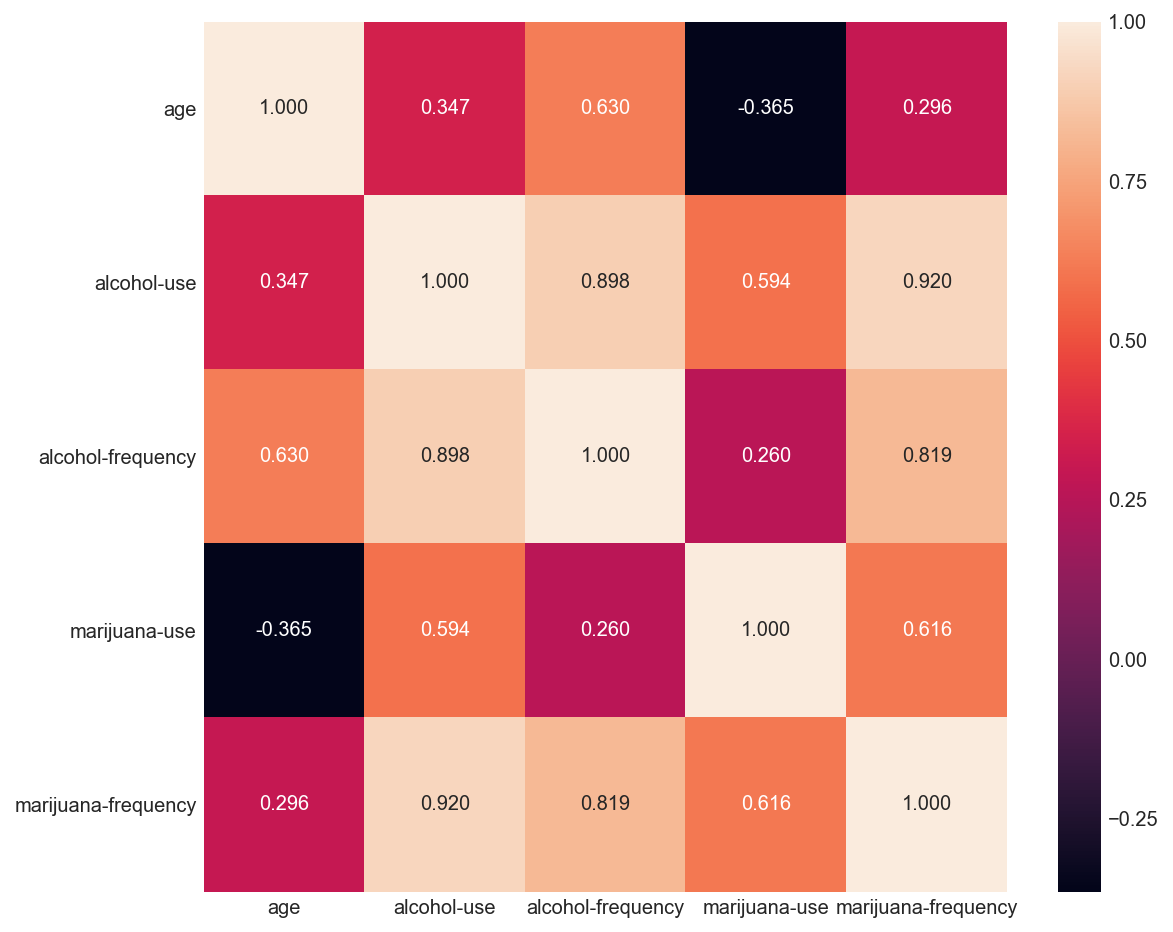

In [70]:
# heatmap for drughypo_df
fig = plt.subplots(figsize=(9,8))

sns.heatmap(drughypo_df.corr(),annot=True,fmt='.3f')

In [71]:
drughypo_df.corr().unstack().sort_values(ascending=False)

marijuana-frequency  marijuana-frequency    1.000000
marijuana-use        marijuana-use          1.000000
alcohol-use          alcohol-use            1.000000
alcohol-frequency    alcohol-frequency      1.000000
age                  age                    1.000000
marijuana-frequency  alcohol-use            0.920425
alcohol-use          marijuana-frequency    0.920425
alcohol-frequency    alcohol-use            0.897889
alcohol-use          alcohol-frequency      0.897889
marijuana-frequency  alcohol-frequency      0.818769
alcohol-frequency    marijuana-frequency    0.818769
age                  alcohol-frequency      0.629531
alcohol-frequency    age                    0.629531
marijuana-frequency  marijuana-use          0.615610
marijuana-use        marijuana-frequency    0.615610
alcohol-use          marijuana-use          0.594165
marijuana-use        alcohol-use            0.594165
alcohol-use          age                    0.347178
age                  alcohol-use            0.

### <font color='blue'> Observations from correlation heatmap above:

Ignoring correlation numbers that are duplicates or correlation with itself (i.e. value of 1.00), we note the following observations:

1) correlation of alcohol-use and marijuana-use: 0.594165 <br>
2) correlation of alcohol-frequency and marijuana-frequency: 0.818769 <br>

#### - Conclusion: the correlation results from the percentage usage and consumption frequencies of alcohol and marijuana show that they are positively correlated.

In [72]:
# conduct hypothesis testing on the statistiscal significance of correlation 
# between percentage usage and consumption frequencies of alcohol and marijuana

# note that we are using p = 0.05 as the level on whether to reject null
# hypothesis, H0: alcohol and marijuana (use and/or frequency) are uncorrelated
a = stats.pearsonr(drughypo_df['alcohol-use'],drughypo_df['marijuana-use'])
b = stats.pearsonr(drughypo_df['alcohol-frequency'],drughypo_df['marijuana-frequency'])

col_list = drughypo_df.columns.tolist()

print('{} and {} correlation: {}, p-value: {}'.format(col_list[1],col_list[3],round(a[0],4),round(a[1],4)))
print('{} and {} correlation: {}, p-value: {}'.format(col_list[2],col_list[4],round(b[0],4),round(b[1],4)))

alcohol-use and marijuana-use correlation: 0.5942, p-value: 0.0119
alcohol-frequency and marijuana-frequency correlation: 0.8188, p-value: 0.0001


### <font color='blue'> Observations from hypothesis testing above and conclusion for this question:

Based on the p-values shown above, we reject the null hypothesis that both correlation pairs are uncorrelated. This implies that as we encourage these drug users to give up their drinking habit (i.e. to reduce percentage use in either alcohol or marijuana) and/or to consume less alcohol (i.e. to reduce frequencies in consuming either alcohol or marijuana), then we should expect to see a fall in the percentage used and/or consumption frequency in marijuana as well.

As a matter of fact, it has been proven by scientific studies that both alcohol and marijuana produce many similar effects where they result in sedation, alterations in judgment and hallucinogenic effects. Hence, drug users tend to use both drugs concurrently or as substitutes.

Concretely, researchers working in this field could work on more focused studies and come up with solutions to encourage these drug users to consume less of one drug (either alcohol or marijuana), and they should expect a reduction in percentage used and consumption frequency because of the correlation shown above. This idea is similar to that of drug substitution effect discussed in previous paragraph where lower consumption of alcohol substitutes for lower consumption of marijuana.

The limitation to this analysis is that more detailed studies should be conducted in order to gain better understanding on drug use/abuse. For example, data can be collected on the youth drug users when they are aged 12 and annual data should be collected on same group of people until they are 21 (entering young adulthood). Through this study, one can understand if exposure to drugs at an early age can induce even greater drug use/abuse such as increased quantities per drug they consumed at age 12 and/or increased number of drugs taken over the years (i.e. started with alcohol at age 12 but this gradually led to consumption of marijuana, stimulant, cocaine, etc.)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

### <font color='blue'> 1. Pull out the rate variable from sat_csv_df

In [73]:
rate = sat_csv_df['Rate']

### <font color='blue'> 2. Any outliers in 'rate'? How do we numerically define outliers?
    - an outlier is defined as a data point that lies below or above 1.5 times of the interquartile range of the 'rate' variable
    
    - rate_outliers returned an empty list and this implies that we have no outliers in 'rate'

In [74]:
q25, q75 = np.percentile(rate,25),np.percentile(rate,75)
iqr = q75-q25

cutoff = iqr * 1.5
lwr, upr = q25-cutoff, q75+cutoff

rate_outliers = []

for num in rate:
    if num > upr or num < lwr:
        rate_outliers.append(num)
    
rate_outliers

[]

### <font color='blue'> 3. Print out the outliers in 'rate'
    - there are no outliers in 'rate'

### <font color='blue'> 4. Remove outliers in 'rate'
    - there are no outliers in 'rate'

### <font color='blue'> 5. Compare the mean, median and standard deviation of 'rate' without outliers to 'rate' with outliers. what is different about them and why?
    - assuming there are outliers in 'rate' and that they are removed, then its mean would get closer to its median and standard deviation would be lower. this is because the presence of outliers exert greater numerical influence over mean and standard deviation as compared to median, which is influenced to a lesser extent.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [75]:
# pearson
sat_csv_df[['Verbal','Math']].corr(method='pearson')

,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


In [76]:
# spearman
sat_csv_df[['Verbal','Math']].corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


### <font color='blue'> 1. Difference between spearman and pearson correlation
    - spearman correlation is calculated using the ranked values of each variable rather than its actual data points
    - pearson correlation is based on measuring the linear relationship between the two variables.

### <font color='blue'> 2. Describe the process of calculating the spearman rank correlation
    - the formula for calculating spearman correlation:
        spearman corr = 1 - [(6 * summate d.i^2) / (n * (n^2-1))]
    
    - we shall first rank our actual data points for X and Y continuous variables by assigning value of 1 for smallest value in each variable
    
    - this ranking system works in ascending order where rank 'n' is assigned to the largest value in respective variables
    
    - note that tied scores will be assigned the same rank, which is calculatd by finding out its averaged rank
    
    - subsequently, we calculate d.i, which is the difference between each data point's ranks by X and Y
    
    - and then we square d.i and sum them up
    
    - lastly, we calculate using the formula show above and where n: the total no. of observations (i.e. data points either by X or Y)

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [77]:
sat_csv_df['rate_percentile'] = sat_csv_df['Rate'].map(lambda x: stats.percentileofscore(sat_csv_df['Rate'],x))

In [78]:
# percentile of California in 'Rate'
sat_csv_df[sat_csv_df['State'] == 'CA']

,State,Rate,Verbal,Math,Rate_sc,Verbal_sc,Math_sc,rate_percentile
23,CA,51,498,517,0.602564,0.144144,0.47561,56.730769


### <font color='blue'> How is percentile related to the spearman rank correlation?
    - percentiles give the ranking of values in 'Rank' and hence, it is possible to calculate its spearman rank correlation using percentiles.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

### <font color='blue'> 1. Why percentile scoring might be useful for dealing with outliers?
    - this is because detection of outliers can be defined as data points that lie 1.5x above or below the data's interquartile range (i.e. upper_quartile + 1.5x or lower)quartile - 1.5x)

In [79]:
drug_df.head()

,age,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12.0,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13.0,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,0.0,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14.0,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15.0,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16.0,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


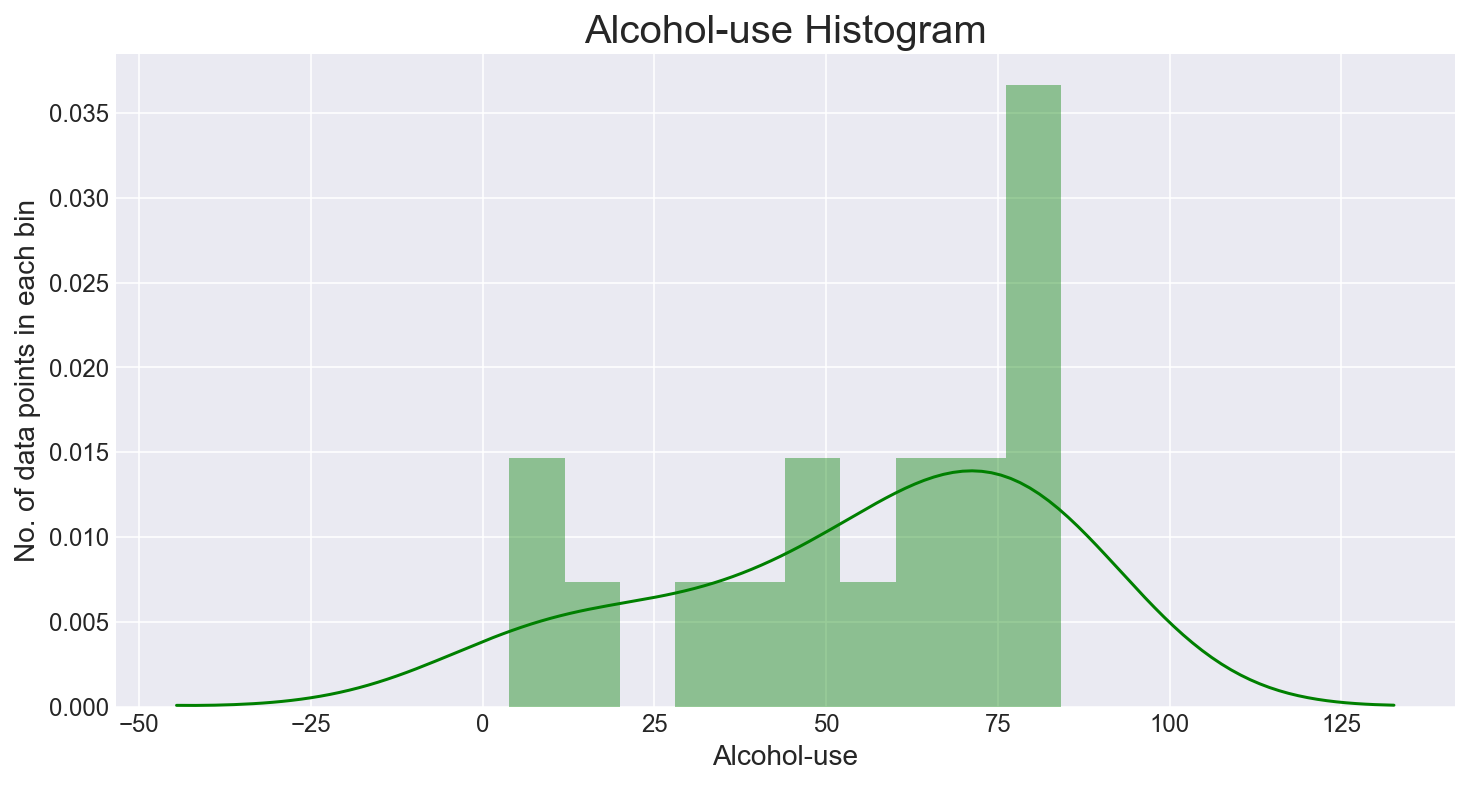

In [80]:
fig, ax = plt.subplots(figsize=(12,6))

sns.distplot(drug_df['alcohol-use'],bins=10,kde=True,color='green')

ax.set_title('Alcohol-use Histogram',fontsize=20)
ax.set_xlabel('Alcohol-use',fontsize=14)
ax.set_ylabel('No. of data points in each bin',fontsize=14)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


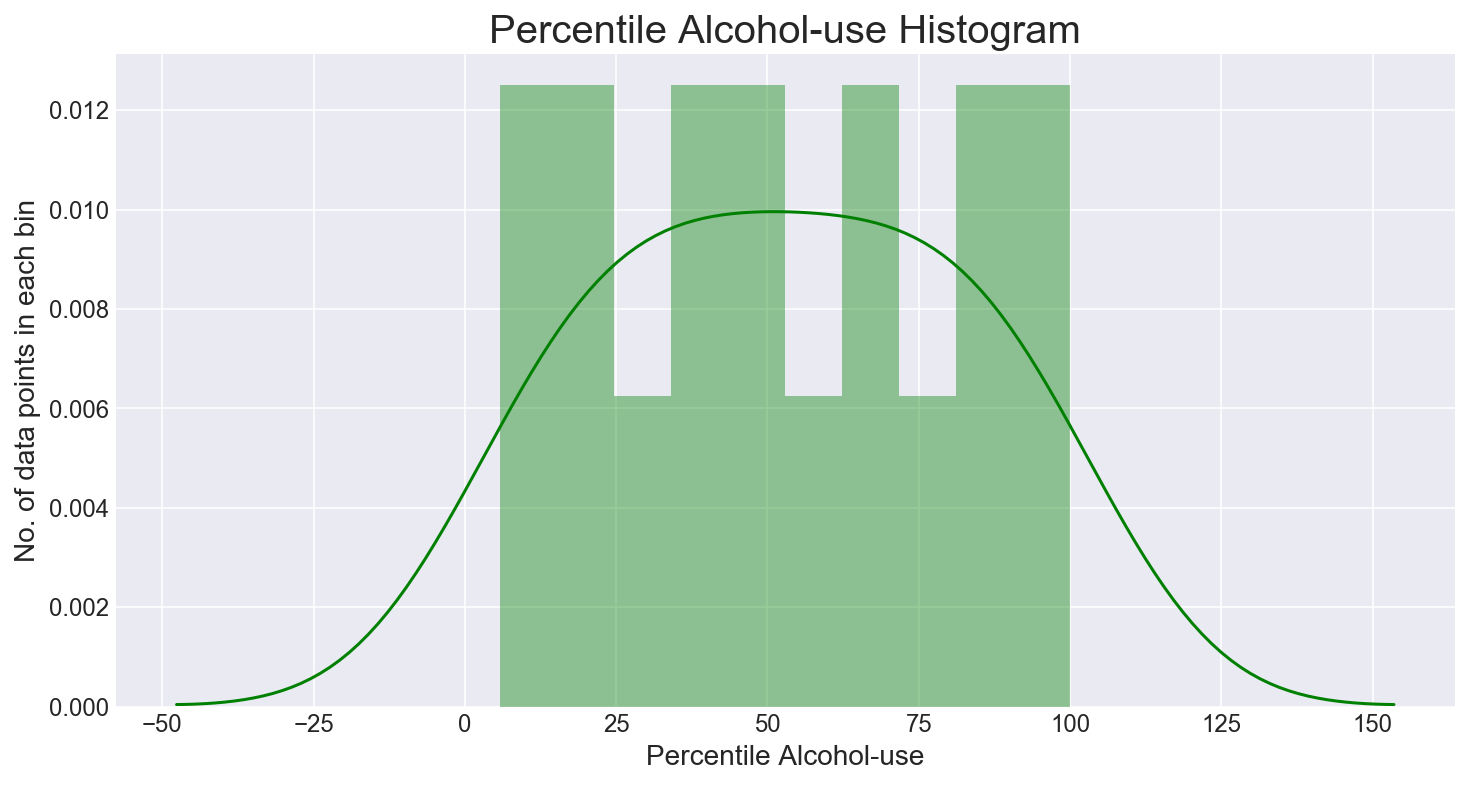

In [81]:
alcoholuse_percentile = [stats.percentileofscore(drug_df['alcohol-use'],x) for x in drug_df['alcohol-use']]

fig, ax = plt.subplots(figsize=(12,6))

sns.distplot(alcoholuse_percentile,bins=10,kde=True,color='green')

ax.set_title('Percentile Alcohol-use Histogram',fontsize=20)
ax.set_xlabel('Percentile Alcohol-use',fontsize=14)
ax.set_ylabel('No. of data points in each bin',fontsize=14)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

### <font color='blue'> 4. Describe the effect, visuaully, of converting raw scores to percentile
    - the distribution (by kde) of percentiles is more evenly spaced out as compared to its raw scores 